In [1]:
import pandas as pd
import numpy as np
import scipy as sp

from numpy.testing import rundocs
import matplotlib.pyplot as plt
#import talib
import random
import sklearn
from sklearn import preprocessing
import tensorflow
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

#from datetime import strptime

In [2]:
le = preprocessing.LabelEncoder()

In [3]:
df = pd.read_excel(open('Cost.xls', 'rb'), sheet_name='Sheet1')
df.head(76)

,Unit Name,Type Unit,Region,Lease/ Own,Water Depth\n(meters),Contracting Date,"Contract (EPC, CL, PS, TK)","Local Content Requirment (H,M,A,L, N)","Technology Novelt (H,M,A,L,N)","FEED Detail (H,M,A,L,N)","FEED Detail (H,M,A,L,N).1",Lessons Learned,"Company (NOC, IOC, OC)",Planned_Duration,Planned_Cost,Schedule_Overrun,Cost_Overrun
0,Stybarrow Venture MV16,1,2,1,825,4096,1,3,3,4,4,2,2,702,0.598425,-0.143875,0.270000
1,Alima FPU,2,1,2,600,3894,1,2,1,4,4,3,2,994,1.133000,-0.022133,0.350000
2,Prelude,6,2,2,250,5988,1,3,5,5,5,1,2,2229,11.160000,0.243158,0.344086
3,CLOV FPSO,1,1,2,1290,5708,1,3,2,5,5,4,2,1383,1.800000,0.007954,0.055556
4,Dalia,1,1,2,1360,3046,1,4,3,2,2,5,2,1306,3.400000,0.010720,0.176471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,P 61 Wellhead TLP,3,3,2,1180,5387,1,5,3,2,2,1,1,1475,1.070000,0.350508,0.000000
72,Stampede TLP,3,5,2,1160,6697,1,1,1,5,5,4,3,1982,6.200000,-0.122099,-0.129032
73,Neptune TLP,3,5,2,1300,3844,1,2,2,4,4,2,3,887,0.850000,0.234498,0.478824
74,Shenzi TLP,3,5,2,1333,4175,1,2,2,5,5,2,3,1119,4.410000,-0.088472,0.000000


In [4]:
df.corr(method ='pearson')

,Type Unit,Region,Lease/ Own,Water Depth\n(meters),Contracting Date,"Contract (EPC, CL, PS, TK)","Local Content Requirment (H,M,A,L, N)","Technology Novelt (H,M,A,L,N)","FEED Detail (H,M,A,L,N)","FEED Detail (H,M,A,L,N).1",Lessons Learned,"Company (NOC, IOC, OC)",Planned_Duration,Planned_Cost,Schedule_Overrun,Cost_Overrun
Type Unit,1.000000,0.277908,0.072967,-0.146347,-0.025961,-0.124808,-0.251130,-0.055205,-0.002732,-0.002732,0.096758,0.193976,0.103483,0.026124,0.063595,0.004221
Region,0.277908,1.000000,-0.006946,-0.024083,0.005344,0.160284,-0.406716,0.272215,0.134451,0.134451,-0.174481,0.350651,0.173991,0.039390,0.300901,0.154278
Lease/ Own,0.072967,-0.006946,1.000000,-0.127005,-0.280705,-0.081756,-0.112716,0.219650,0.094080,0.094080,-0.035688,0.198860,0.204612,0.177376,0.050193,0.068089
Water Depth\n(meters),-0.146347,-0.024083,-0.127005,1.000000,0.247212,0.044386,-0.070591,-0.133523,-0.009056,-0.009056,0.194628,-0.177674,0.081903,0.180464,-0.148164,0.170804
Contracting Date,-0.025961,0.005344,-0.280705,0.247212,1.000000,-0.219852,-0.160863,-0.050298,0.413132,0.413132,0.187664,-0.138680,0.449640,0.416290,-0.193738,-0.160165
"Contract (EPC, CL, PS, TK)",-0.124808,0.160284,-0.081756,0.044386,-0.219852,1.000000,0.239551,-0.101335,-0.353367,-0.353367,0.051561,-0.116194,-0.247217,-0.190940,0.273431,0.071446
"Local Content Requirment (H,M,A,L, N)",-0.251130,-0.406716,-0.112716,-0.070591,-0.160863,0.239551,1.000000,-0.047032,-0.507230,-0.507230,0.059288,-0.570595,-0.040195,-0.087483,0.054777,-0.000527
"Technology Novelt (H,M,A,L,N)",-0.055205,0.272215,0.219650,-0.133523,-0.050298,-0.101335,-0.047032,1.000000,0.196838,0.196838,-0.534418,0.317391,0.178324,0.254867,0.394222,0.303737
"FEED Detail (H,M,A,L,N)",-0.002732,0.134451,0.094080,-0.009056,0.413132,-0.353367,-0.507230,0.196838,1.000000,1.000000,-0.109488,0.411265,0.325880,0.268944,-0.228402,0.000090
"FEED Detail (H,M,A,L,N).1",-0.002732,0.134451,0.094080,-0.009056,0.413132,-0.353367,-0.507230,0.196838,1.000000,1.000000,-0.109488,0.411265,0.325880,0.268944,-0.228402,0.000090


In [5]:
dataset = df.values

In [6]:
dataset

array([['Stybarrow Venture MV16', 1, 2, ..., 0.5984251968503937,
        -0.14387464387464388, 0.2699999999999999],
       ['Alima FPU', 2, 1, ..., 1.133, -0.022132796780684104,
        0.35000000000000014],
       ['Prelude', 6, 2, ..., 11.16, 0.24315836698070883,
        0.3440860215053763],
       ...,
       ['Neptune TLP', 3, 5, ..., 0.85, 0.23449830890642615,
        0.47882352941176465],
       ['Shenzi TLP', 3, 5, ..., 4.41, -0.08847184986595175, 0.0],
       ['Big Foot', 3, 5, ..., 4.0, 0.9489862655330281,
        0.2749999999999999]], dtype=object)

In [7]:
X = dataset[:,1:15]

In [8]:
X

array([[1, 2, 1, ..., 2, 702, 0.5984251968503937],
       [2, 1, 2, ..., 2, 994, 1.133],
       [6, 2, 2, ..., 2, 2229, 11.16],
       ...,
       [3, 5, 2, ..., 3, 887, 0.85],
       [3, 5, 2, ..., 3, 1119, 4.41],
       [3, 5, 2, ..., 2, 1529, 4.0]], dtype=object)

In [9]:
Y = dataset[:,16]

In [10]:
Y

array([0.2699999999999999, 0.35000000000000014, 0.3440860215053763,
       0.05555555555555548, 0.17647058823529416, 0.11999999999999993,
       0.13333333333333341, 0.0, 0.0, 0.85, 0.4, 0.0, 0.3,
       1.5499999999999998, 0.5000000000000001, -0.09375,
       0.5700000000000003, 0.13333333333333322, 0.32352941176470584,
       0.012027952212040005, 0.3333333333333333, 0.4112903225806451,
       0.3846153846153846, 0.3846153846153846, 1.35, 0.004184100418409952,
       0.59441052, 0.2538461538461537, 1.3199999999999996,
       0.971383147853736, 0.00554235946159946, 0.3076923076923076,
       0.19999999999999996, 0.31099999999999994, 0.3600000000000001, 0.62,
       0.52, 0.36974789915966394, 0.7, 0.1924686192468619,
       0.3999999999999999, 0.08333333333333341, 0.08333333333333341,
       0.8500000000000002, 0.0, 0.3235294117647059, 0.2499999999999999,
       0.0714285714285715, 0.434878587196468, 1.35, 0.0, 0.95, 0.0,
       2.6800000000000006, 0.0, 0.0, 0.7368421052631579,
       

In [11]:
from sklearn import preprocessing

In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [13]:
X_scale

array([[0.        , 0.16666667, 0.        , ..., 0.5       , 0.11426914,
        0.02875139],
       [0.14285714, 0.        , 1.        , ..., 0.5       , 0.28364269,
        0.06246256],
       [0.71428571, 0.16666667, 1.        , ..., 0.5       , 1.        ,
        0.69478165],
       ...,
       [0.28571429, 0.66666667, 1.        , ..., 1.        , 0.22157773,
        0.04461611],
       [0.28571429, 0.66666667, 1.        , ..., 1.        , 0.35614849,
        0.26911556],
       [0.28571429, 0.66666667, 1.        , ..., 0.5       , 0.59396752,
        0.24326029]])

In [14]:
min_max_scaler2 = preprocessing.MinMaxScaler()
#Y_scale = min_max_scaler2.fit_transform(Y)

In [15]:
#Y_scale

In [16]:
from sklearn.feature_extraction import DictVectorizer

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)
#X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
#X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)

In [19]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [20]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(53, 14) (11, 14) (12, 14) (53,) (11,) (12,)


In [21]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [22]:
# define 10-fold cross validation test harness
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [24]:
for train, test in kfold.split(X_scale, Y):
# create model
	model2 = Sequential()
	model2.add(Dense(28, input_dim=14, activation='relu'))
	model2.add(Dense(8, activation='relu'))
	model2.add(Dense(1, activation='sigmoid'))
	# Compile model
	model2.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model2.fit(X_scale[train], Y[train], epochs=150, batch_size=9, verbose=0)
	# evaluate the model
	scores = model2.evaluate(X_scale[train], Y[train], verbose=0)
	print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 16.18%
accuracy: 14.71%
accuracy: 17.65%
accuracy: 16.18%
accuracy: 17.65%
accuracy: 16.18%
accuracy: 15.94%
accuracy: 13.04%
accuracy: 13.04%
accuracy: 15.94%
15.65% (+/- 1.53%)


In [25]:
cvscores2 = []
for train, test in kfold.split(X_train, Y_train):
# create model
    model3 = Sequential([
        Dense(28, activation='sigmoid', input_shape=(14,)),
        Dense(3, activation='sigmoid'),
        Dense(1, activation='sigmoid'),
    ])
    epochs=400
    learning_rate = 0.1
    decay_rate = learning_rate / epochs
    momentum = 0.8
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model3.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
    hist3 = model3.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))
    scores = model3.evaluate(X_scale[train], Y[train], verbose=0)
    cvscores2.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores2), np.std(cvscores)))    


Train on 53 samples, validate on 11 samples
Epoch 1/400
53/53 [==============================] - 0s 9ms/step - loss: 0.2696 - accuracy: 0.0755 - val_loss: 0.2599 - val_accuracy: 0.0000e+00
Epoch 2/400
53/53 [==============================] - 0s 424us/step - loss: 0.2669 - accuracy: 0.0755 - val_loss: 0.2543 - val_accuracy: 0.0000e+00
Epoch 3/400
53/53 [==============================] - 0s 553us/step - loss: 0.2625 - accuracy: 0.0755 - val_loss: 0.2537 - val_accuracy: 0.0000e+00
Epoch 4/400
53/53 [==============================] - 0s 294us/step - loss: 0.2606 - accuracy: 0.0943 - val_loss: 0.2532 - val_accuracy: 0.0000e+00
Epoch 5/400
53/53 [==============================] - 0s 288us/step - loss: 0.2594 - accuracy: 0.0943 - val_loss: 0.2526 - val_accuracy: 0.0000e+00
Epoch 6/400
53/53 [==============================] - 0s 298us/step - loss: 0.2583 - accuracy: 0.0943 - val_loss: 0.2522 - val_accuracy: 0.0000e+00
Epoch 7/400
53/53 [==============================] - 0s 275us/step - loss: 0

53/53 [==============================] - 0s 257us/step - loss: 0.2355 - accuracy: 0.1509 - val_loss: 0.2500 - val_accuracy: 0.0909
Epoch 58/400
53/53 [==============================] - 0s 227us/step - loss: 0.2354 - accuracy: 0.1509 - val_loss: 0.2500 - val_accuracy: 0.0909
Epoch 59/400
53/53 [==============================] - 0s 246us/step - loss: 0.2352 - accuracy: 0.1509 - val_loss: 0.2501 - val_accuracy: 0.0909
Epoch 60/400
53/53 [==============================] - 0s 235us/step - loss: 0.2352 - accuracy: 0.1509 - val_loss: 0.2502 - val_accuracy: 0.0909
Epoch 61/400
53/53 [==============================] - 0s 234us/step - loss: 0.2350 - accuracy: 0.1509 - val_loss: 0.2503 - val_accuracy: 0.0909
Epoch 62/400
53/53 [==============================] - 0s 243us/step - loss: 0.2349 - accuracy: 0.1509 - val_loss: 0.2504 - val_accuracy: 0.0909
Epoch 63/400
53/53 [==============================] - 0s 242us/step - loss: 0.2348 - accuracy: 0.1509 - val_loss: 0.2505 - val_accuracy: 0.0909
Epoch

Epoch 114/400
53/53 [==============================] - 0s 236us/step - loss: 0.2326 - accuracy: 0.1509 - val_loss: 0.2543 - val_accuracy: 0.0909
Epoch 115/400
53/53 [==============================] - 0s 244us/step - loss: 0.2325 - accuracy: 0.1509 - val_loss: 0.2544 - val_accuracy: 0.0909
Epoch 116/400
53/53 [==============================] - 0s 238us/step - loss: 0.2325 - accuracy: 0.1509 - val_loss: 0.2544 - val_accuracy: 0.0909
Epoch 117/400
53/53 [==============================] - 0s 231us/step - loss: 0.2325 - accuracy: 0.1509 - val_loss: 0.2545 - val_accuracy: 0.0909
Epoch 118/400
53/53 [==============================] - 0s 221us/step - loss: 0.2325 - accuracy: 0.1509 - val_loss: 0.2545 - val_accuracy: 0.0909
Epoch 119/400
53/53 [==============================] - 0s 241us/step - loss: 0.2325 - accuracy: 0.1509 - val_loss: 0.2545 - val_accuracy: 0.0909
Epoch 120/400
53/53 [==============================] - 0s 233us/step - loss: 0.2325 - accuracy: 0.1509 - val_loss: 0.2546 - val_ac

53/53 [==============================] - 0s 247us/step - loss: 0.2318 - accuracy: 0.1509 - val_loss: 0.2562 - val_accuracy: 0.0909
Epoch 171/400
53/53 [==============================] - 0s 247us/step - loss: 0.2318 - accuracy: 0.1509 - val_loss: 0.2562 - val_accuracy: 0.0909
Epoch 172/400
53/53 [==============================] - 0s 222us/step - loss: 0.2318 - accuracy: 0.1509 - val_loss: 0.2562 - val_accuracy: 0.0909
Epoch 173/400
53/53 [==============================] - 0s 237us/step - loss: 0.2319 - accuracy: 0.1509 - val_loss: 0.2562 - val_accuracy: 0.0909
Epoch 174/400
53/53 [==============================] - 0s 249us/step - loss: 0.2318 - accuracy: 0.1509 - val_loss: 0.2562 - val_accuracy: 0.0909
Epoch 175/400
53/53 [==============================] - 0s 241us/step - loss: 0.2318 - accuracy: 0.1509 - val_loss: 0.2563 - val_accuracy: 0.0909
Epoch 176/400
53/53 [==============================] - 0s 250us/step - loss: 0.2318 - accuracy: 0.1509 - val_loss: 0.2563 - val_accuracy: 0.0909

53/53 [==============================] - 0s 278us/step - loss: 0.2313 - accuracy: 0.1509 - val_loss: 0.2568 - val_accuracy: 0.0909
Epoch 227/400
53/53 [==============================] - 0s 298us/step - loss: 0.2313 - accuracy: 0.1509 - val_loss: 0.2568 - val_accuracy: 0.0909
Epoch 228/400
53/53 [==============================] - 0s 275us/step - loss: 0.2313 - accuracy: 0.1509 - val_loss: 0.2568 - val_accuracy: 0.0909
Epoch 229/400
53/53 [==============================] - 0s 242us/step - loss: 0.2313 - accuracy: 0.1509 - val_loss: 0.2568 - val_accuracy: 0.0909
Epoch 230/400
53/53 [==============================] - 0s 268us/step - loss: 0.2313 - accuracy: 0.1509 - val_loss: 0.2568 - val_accuracy: 0.0909
Epoch 231/400
53/53 [==============================] - 0s 254us/step - loss: 0.2312 - accuracy: 0.1509 - val_loss: 0.2568 - val_accuracy: 0.0909
Epoch 232/400
53/53 [==============================] - 0s 265us/step - loss: 0.2313 - accuracy: 0.1509 - val_loss: 0.2569 - val_accuracy: 0.0909

53/53 [==============================] - 0s 241us/step - loss: 0.2309 - accuracy: 0.1509 - val_loss: 0.2571 - val_accuracy: 0.0909
Epoch 283/400
53/53 [==============================] - 0s 251us/step - loss: 0.2308 - accuracy: 0.1509 - val_loss: 0.2571 - val_accuracy: 0.0909
Epoch 284/400
53/53 [==============================] - 0s 225us/step - loss: 0.2308 - accuracy: 0.1509 - val_loss: 0.2571 - val_accuracy: 0.0909
Epoch 285/400
53/53 [==============================] - 0s 242us/step - loss: 0.2308 - accuracy: 0.1509 - val_loss: 0.2571 - val_accuracy: 0.0909
Epoch 286/400
53/53 [==============================] - 0s 237us/step - loss: 0.2309 - accuracy: 0.1509 - val_loss: 0.2571 - val_accuracy: 0.0909
Epoch 287/400
53/53 [==============================] - 0s 246us/step - loss: 0.2308 - accuracy: 0.1509 - val_loss: 0.2571 - val_accuracy: 0.0909
Epoch 288/400
53/53 [==============================] - 0s 238us/step - loss: 0.2308 - accuracy: 0.1509 - val_loss: 0.2571 - val_accuracy: 0.0909

53/53 [==============================] - 0s 252us/step - loss: 0.2305 - accuracy: 0.1509 - val_loss: 0.2572 - val_accuracy: 0.0909
Epoch 339/400
53/53 [==============================] - 0s 239us/step - loss: 0.2304 - accuracy: 0.1509 - val_loss: 0.2572 - val_accuracy: 0.0909
Epoch 340/400
53/53 [==============================] - 0s 238us/step - loss: 0.2304 - accuracy: 0.1509 - val_loss: 0.2572 - val_accuracy: 0.0909
Epoch 341/400
53/53 [==============================] - 0s 239us/step - loss: 0.2304 - accuracy: 0.1509 - val_loss: 0.2572 - val_accuracy: 0.0909
Epoch 342/400
53/53 [==============================] - 0s 235us/step - loss: 0.2304 - accuracy: 0.1509 - val_loss: 0.2572 - val_accuracy: 0.0909
Epoch 343/400
53/53 [==============================] - 0s 238us/step - loss: 0.2304 - accuracy: 0.1509 - val_loss: 0.2572 - val_accuracy: 0.0909
Epoch 344/400
53/53 [==============================] - 0s 245us/step - loss: 0.2304 - accuracy: 0.1509 - val_loss: 0.2572 - val_accuracy: 0.0909

53/53 [==============================] - 0s 254us/step - loss: 0.2300 - accuracy: 0.1509 - val_loss: 0.2573 - val_accuracy: 0.0909
Epoch 395/400
53/53 [==============================] - 0s 229us/step - loss: 0.2300 - accuracy: 0.1509 - val_loss: 0.2573 - val_accuracy: 0.0909
Epoch 396/400
53/53 [==============================] - 0s 247us/step - loss: 0.2300 - accuracy: 0.1509 - val_loss: 0.2573 - val_accuracy: 0.0909
Epoch 397/400
53/53 [==============================] - 0s 249us/step - loss: 0.2300 - accuracy: 0.1509 - val_loss: 0.2573 - val_accuracy: 0.0909
Epoch 398/400
53/53 [==============================] - 0s 241us/step - loss: 0.2300 - accuracy: 0.1509 - val_loss: 0.2573 - val_accuracy: 0.0909
Epoch 399/400
53/53 [==============================] - 0s 242us/step - loss: 0.2300 - accuracy: 0.1509 - val_loss: 0.2573 - val_accuracy: 0.0909
Epoch 400/400
53/53 [==============================] - 0s 241us/step - loss: 0.2299 - accuracy: 0.1509 - val_loss: 0.2573 - val_accuracy: 0.0909

Epoch 51/400
53/53 [==============================] - 0s 241us/step - loss: 0.2324 - accuracy: 0.1509 - val_loss: 0.2623 - val_accuracy: 0.0909
Epoch 52/400
53/53 [==============================] - 0s 223us/step - loss: 0.2324 - accuracy: 0.1509 - val_loss: 0.2623 - val_accuracy: 0.0909
Epoch 53/400
53/53 [==============================] - 0s 231us/step - loss: 0.2324 - accuracy: 0.1509 - val_loss: 0.2624 - val_accuracy: 0.0909
Epoch 54/400
53/53 [==============================] - 0s 257us/step - loss: 0.2323 - accuracy: 0.1509 - val_loss: 0.2624 - val_accuracy: 0.0909
Epoch 55/400
53/53 [==============================] - 0s 224us/step - loss: 0.2323 - accuracy: 0.1509 - val_loss: 0.2625 - val_accuracy: 0.0909
Epoch 56/400
53/53 [==============================] - 0s 232us/step - loss: 0.2323 - accuracy: 0.1509 - val_loss: 0.2625 - val_accuracy: 0.0909
Epoch 57/400
53/53 [==============================] - 0s 244us/step - loss: 0.2323 - accuracy: 0.1509 - val_loss: 0.2626 - val_accuracy:

Epoch 108/400
53/53 [==============================] - 0s 243us/step - loss: 0.2317 - accuracy: 0.1509 - val_loss: 0.2643 - val_accuracy: 0.0909
Epoch 109/400
53/53 [==============================] - 0s 248us/step - loss: 0.2318 - accuracy: 0.1509 - val_loss: 0.2643 - val_accuracy: 0.0909
Epoch 110/400
53/53 [==============================] - 0s 234us/step - loss: 0.2318 - accuracy: 0.1509 - val_loss: 0.2643 - val_accuracy: 0.0909
Epoch 111/400
53/53 [==============================] - 0s 254us/step - loss: 0.2318 - accuracy: 0.1509 - val_loss: 0.2644 - val_accuracy: 0.0909
Epoch 112/400
53/53 [==============================] - 0s 254us/step - loss: 0.2317 - accuracy: 0.1509 - val_loss: 0.2644 - val_accuracy: 0.0909
Epoch 113/400
53/53 [==============================] - 0s 236us/step - loss: 0.2318 - accuracy: 0.1509 - val_loss: 0.2644 - val_accuracy: 0.0909
Epoch 114/400
53/53 [==============================] - 0s 234us/step - loss: 0.2317 - accuracy: 0.1509 - val_loss: 0.2645 - val_ac

53/53 [==============================] - 0s 241us/step - loss: 0.2313 - accuracy: 0.1509 - val_loss: 0.2654 - val_accuracy: 0.0909
Epoch 165/400
53/53 [==============================] - 0s 244us/step - loss: 0.2313 - accuracy: 0.1509 - val_loss: 0.2654 - val_accuracy: 0.0909
Epoch 166/400
53/53 [==============================] - 0s 226us/step - loss: 0.2313 - accuracy: 0.1509 - val_loss: 0.2654 - val_accuracy: 0.0909
Epoch 167/400
53/53 [==============================] - 0s 253us/step - loss: 0.2314 - accuracy: 0.1509 - val_loss: 0.2654 - val_accuracy: 0.0909
Epoch 168/400
53/53 [==============================] - 0s 243us/step - loss: 0.2313 - accuracy: 0.1509 - val_loss: 0.2654 - val_accuracy: 0.0909
Epoch 169/400
53/53 [==============================] - 0s 250us/step - loss: 0.2313 - accuracy: 0.1509 - val_loss: 0.2654 - val_accuracy: 0.0909
Epoch 170/400
53/53 [==============================] - 0s 244us/step - loss: 0.2313 - accuracy: 0.1509 - val_loss: 0.2654 - val_accuracy: 0.0909

53/53 [==============================] - 0s 226us/step - loss: 0.2310 - accuracy: 0.1509 - val_loss: 0.2659 - val_accuracy: 0.0909
Epoch 221/400
53/53 [==============================] - 0s 249us/step - loss: 0.2310 - accuracy: 0.1509 - val_loss: 0.2659 - val_accuracy: 0.0909
Epoch 222/400
53/53 [==============================] - 0s 241us/step - loss: 0.2310 - accuracy: 0.1509 - val_loss: 0.2659 - val_accuracy: 0.0909
Epoch 223/400
53/53 [==============================] - 0s 242us/step - loss: 0.2310 - accuracy: 0.1509 - val_loss: 0.2659 - val_accuracy: 0.0909
Epoch 224/400
53/53 [==============================] - 0s 223us/step - loss: 0.2310 - accuracy: 0.1509 - val_loss: 0.2659 - val_accuracy: 0.0909
Epoch 225/400
53/53 [==============================] - 0s 249us/step - loss: 0.2310 - accuracy: 0.1509 - val_loss: 0.2659 - val_accuracy: 0.0909
Epoch 226/400
53/53 [==============================] - 0s 241us/step - loss: 0.2310 - accuracy: 0.1509 - val_loss: 0.2659 - val_accuracy: 0.0909

53/53 [==============================] - 0s 257us/step - loss: 0.2308 - accuracy: 0.1509 - val_loss: 0.2661 - val_accuracy: 0.0909
Epoch 277/400
53/53 [==============================] - 0s 247us/step - loss: 0.2307 - accuracy: 0.1509 - val_loss: 0.2661 - val_accuracy: 0.0909
Epoch 278/400
53/53 [==============================] - 0s 237us/step - loss: 0.2308 - accuracy: 0.1509 - val_loss: 0.2661 - val_accuracy: 0.0909
Epoch 279/400
53/53 [==============================] - 0s 249us/step - loss: 0.2307 - accuracy: 0.1509 - val_loss: 0.2661 - val_accuracy: 0.0909
Epoch 280/400
53/53 [==============================] - 0s 239us/step - loss: 0.2307 - accuracy: 0.1509 - val_loss: 0.2661 - val_accuracy: 0.0909
Epoch 281/400
53/53 [==============================] - 0s 231us/step - loss: 0.2307 - accuracy: 0.1509 - val_loss: 0.2661 - val_accuracy: 0.0909
Epoch 282/400
53/53 [==============================] - 0s 244us/step - loss: 0.2307 - accuracy: 0.1509 - val_loss: 0.2662 - val_accuracy: 0.0909

53/53 [==============================] - 0s 237us/step - loss: 0.2303 - accuracy: 0.1509 - val_loss: 0.2664 - val_accuracy: 0.0909
Epoch 333/400
53/53 [==============================] - 0s 233us/step - loss: 0.2303 - accuracy: 0.1509 - val_loss: 0.2664 - val_accuracy: 0.0909
Epoch 334/400
53/53 [==============================] - 0s 232us/step - loss: 0.2303 - accuracy: 0.1509 - val_loss: 0.2664 - val_accuracy: 0.0909
Epoch 335/400
53/53 [==============================] - 0s 220us/step - loss: 0.2303 - accuracy: 0.1509 - val_loss: 0.2664 - val_accuracy: 0.0909
Epoch 336/400
53/53 [==============================] - 0s 236us/step - loss: 0.2304 - accuracy: 0.1509 - val_loss: 0.2664 - val_accuracy: 0.0909
Epoch 337/400
53/53 [==============================] - 0s 231us/step - loss: 0.2303 - accuracy: 0.1509 - val_loss: 0.2664 - val_accuracy: 0.0909
Epoch 338/400
53/53 [==============================] - 0s 217us/step - loss: 0.2303 - accuracy: 0.1509 - val_loss: 0.2664 - val_accuracy: 0.0909

53/53 [==============================] - 0s 228us/step - loss: 0.2300 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909
Epoch 389/400
53/53 [==============================] - 0s 233us/step - loss: 0.2300 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909
Epoch 390/400
53/53 [==============================] - 0s 235us/step - loss: 0.2300 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909
Epoch 391/400
53/53 [==============================] - 0s 235us/step - loss: 0.2300 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909
Epoch 392/400
53/53 [==============================] - 0s 236us/step - loss: 0.2300 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909
Epoch 393/400
53/53 [==============================] - 0s 231us/step - loss: 0.2300 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909
Epoch 394/400
53/53 [==============================] - 0s 233us/step - loss: 0.2300 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909

Epoch 43/400
53/53 [==============================] - 0s 226us/step - loss: 0.2563 - accuracy: 0.0566 - val_loss: 0.2611 - val_accuracy: 0.0909
Epoch 44/400
53/53 [==============================] - 0s 232us/step - loss: 0.2554 - accuracy: 0.0755 - val_loss: 0.2608 - val_accuracy: 0.0909
Epoch 45/400
53/53 [==============================] - 0s 235us/step - loss: 0.2545 - accuracy: 0.0943 - val_loss: 0.2606 - val_accuracy: 0.0909
Epoch 46/400
53/53 [==============================] - 0s 236us/step - loss: 0.2538 - accuracy: 0.1509 - val_loss: 0.2603 - val_accuracy: 0.0909
Epoch 47/400
53/53 [==============================] - 0s 220us/step - loss: 0.2532 - accuracy: 0.1509 - val_loss: 0.2601 - val_accuracy: 0.0909
Epoch 48/400
53/53 [==============================] - 0s 245us/step - loss: 0.2525 - accuracy: 0.1509 - val_loss: 0.2599 - val_accuracy: 0.0909
Epoch 49/400
53/53 [==============================] - 0s 217us/step - loss: 0.2519 - accuracy: 0.1509 - val_loss: 0.2597 - val_accuracy:

Epoch 100/400
53/53 [==============================] - 0s 239us/step - loss: 0.2361 - accuracy: 0.1509 - val_loss: 0.2588 - val_accuracy: 0.0909
Epoch 101/400
53/53 [==============================] - 0s 242us/step - loss: 0.2360 - accuracy: 0.1509 - val_loss: 0.2589 - val_accuracy: 0.0909
Epoch 102/400
53/53 [==============================] - 0s 225us/step - loss: 0.2359 - accuracy: 0.1509 - val_loss: 0.2589 - val_accuracy: 0.0909
Epoch 103/400
53/53 [==============================] - 0s 245us/step - loss: 0.2357 - accuracy: 0.1509 - val_loss: 0.2590 - val_accuracy: 0.0909
Epoch 104/400
53/53 [==============================] - 0s 234us/step - loss: 0.2357 - accuracy: 0.1509 - val_loss: 0.2591 - val_accuracy: 0.0909
Epoch 105/400
53/53 [==============================] - 0s 219us/step - loss: 0.2355 - accuracy: 0.1509 - val_loss: 0.2591 - val_accuracy: 0.0909
Epoch 106/400
53/53 [==============================] - 0s 235us/step - loss: 0.2354 - accuracy: 0.1509 - val_loss: 0.2592 - val_ac

53/53 [==============================] - 0s 231us/step - loss: 0.2322 - accuracy: 0.1509 - val_loss: 0.2623 - val_accuracy: 0.0909
Epoch 157/400
53/53 [==============================] - 0s 235us/step - loss: 0.2322 - accuracy: 0.1509 - val_loss: 0.2624 - val_accuracy: 0.0909
Epoch 158/400
53/53 [==============================] - 0s 229us/step - loss: 0.2322 - accuracy: 0.1509 - val_loss: 0.2624 - val_accuracy: 0.0909
Epoch 159/400
53/53 [==============================] - 0s 241us/step - loss: 0.2321 - accuracy: 0.1509 - val_loss: 0.2625 - val_accuracy: 0.0909
Epoch 160/400
53/53 [==============================] - 0s 226us/step - loss: 0.2321 - accuracy: 0.1509 - val_loss: 0.2625 - val_accuracy: 0.0909
Epoch 161/400
53/53 [==============================] - 0s 243us/step - loss: 0.2321 - accuracy: 0.1509 - val_loss: 0.2626 - val_accuracy: 0.0909
Epoch 162/400
53/53 [==============================] - 0s 231us/step - loss: 0.2321 - accuracy: 0.1509 - val_loss: 0.2626 - val_accuracy: 0.0909

53/53 [==============================] - 0s 250us/step - loss: 0.2311 - accuracy: 0.1509 - val_loss: 0.2647 - val_accuracy: 0.0909
Epoch 213/400
53/53 [==============================] - 0s 253us/step - loss: 0.2310 - accuracy: 0.1509 - val_loss: 0.2647 - val_accuracy: 0.0909
Epoch 214/400
53/53 [==============================] - 0s 238us/step - loss: 0.2310 - accuracy: 0.1509 - val_loss: 0.2648 - val_accuracy: 0.0909
Epoch 215/400
53/53 [==============================] - 0s 236us/step - loss: 0.2310 - accuracy: 0.1509 - val_loss: 0.2648 - val_accuracy: 0.0909
Epoch 216/400
53/53 [==============================] - 0s 232us/step - loss: 0.2310 - accuracy: 0.1509 - val_loss: 0.2648 - val_accuracy: 0.0909
Epoch 217/400
53/53 [==============================] - 0s 230us/step - loss: 0.2310 - accuracy: 0.1509 - val_loss: 0.2649 - val_accuracy: 0.0909
Epoch 218/400
53/53 [==============================] - 0s 245us/step - loss: 0.2309 - accuracy: 0.1509 - val_loss: 0.2649 - val_accuracy: 0.0909

53/53 [==============================] - 0s 249us/step - loss: 0.2304 - accuracy: 0.1509 - val_loss: 0.2660 - val_accuracy: 0.0909
Epoch 269/400
53/53 [==============================] - 0s 239us/step - loss: 0.2304 - accuracy: 0.1509 - val_loss: 0.2660 - val_accuracy: 0.0909
Epoch 270/400
53/53 [==============================] - 0s 240us/step - loss: 0.2303 - accuracy: 0.1509 - val_loss: 0.2660 - val_accuracy: 0.0909
Epoch 271/400
53/53 [==============================] - 0s 281us/step - loss: 0.2303 - accuracy: 0.1509 - val_loss: 0.2660 - val_accuracy: 0.0909
Epoch 272/400
53/53 [==============================] - 0s 234us/step - loss: 0.2303 - accuracy: 0.1509 - val_loss: 0.2660 - val_accuracy: 0.0909
Epoch 273/400
53/53 [==============================] - 0s 274us/step - loss: 0.2303 - accuracy: 0.1509 - val_loss: 0.2660 - val_accuracy: 0.0909
Epoch 274/400
53/53 [==============================] - 0s 235us/step - loss: 0.2303 - accuracy: 0.1509 - val_loss: 0.2660 - val_accuracy: 0.0909

53/53 [==============================] - 0s 250us/step - loss: 0.2298 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909
Epoch 325/400
53/53 [==============================] - 0s 243us/step - loss: 0.2298 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909
Epoch 326/400
53/53 [==============================] - 0s 227us/step - loss: 0.2298 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909
Epoch 327/400
53/53 [==============================] - 0s 259us/step - loss: 0.2298 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909
Epoch 328/400
53/53 [==============================] - 0s 227us/step - loss: 0.2298 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909
Epoch 329/400
53/53 [==============================] - 0s 252us/step - loss: 0.2297 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909
Epoch 330/400
53/53 [==============================] - 0s 227us/step - loss: 0.2298 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909

53/53 [==============================] - 0s 229us/step - loss: 0.2293 - accuracy: 0.1509 - val_loss: 0.2668 - val_accuracy: 0.0909
Epoch 381/400
53/53 [==============================] - 0s 224us/step - loss: 0.2293 - accuracy: 0.1509 - val_loss: 0.2668 - val_accuracy: 0.0909
Epoch 382/400
53/53 [==============================] - 0s 252us/step - loss: 0.2293 - accuracy: 0.1509 - val_loss: 0.2668 - val_accuracy: 0.0909
Epoch 383/400
53/53 [==============================] - 0s 238us/step - loss: 0.2292 - accuracy: 0.1509 - val_loss: 0.2668 - val_accuracy: 0.0909
Epoch 384/400
53/53 [==============================] - 0s 263us/step - loss: 0.2292 - accuracy: 0.1509 - val_loss: 0.2668 - val_accuracy: 0.0909
Epoch 385/400
53/53 [==============================] - 0s 241us/step - loss: 0.2292 - accuracy: 0.1509 - val_loss: 0.2668 - val_accuracy: 0.0909
Epoch 386/400
53/53 [==============================] - 0s 238us/step - loss: 0.2292 - accuracy: 0.1509 - val_loss: 0.2668 - val_accuracy: 0.0909

53/53 [==============================] - 0s 271us/step - loss: 0.2620 - accuracy: 0.0189 - val_loss: 0.2617 - val_accuracy: 0.0000e+00
Epoch 36/400
53/53 [==============================] - 0s 257us/step - loss: 0.2610 - accuracy: 0.0189 - val_loss: 0.2613 - val_accuracy: 0.0000e+00
Epoch 37/400
53/53 [==============================] - 0s 250us/step - loss: 0.2601 - accuracy: 0.0189 - val_loss: 0.2608 - val_accuracy: 0.0000e+00
Epoch 38/400
53/53 [==============================] - 0s 253us/step - loss: 0.2591 - accuracy: 0.0189 - val_loss: 0.2604 - val_accuracy: 0.0000e+00
Epoch 39/400
53/53 [==============================] - 0s 244us/step - loss: 0.2582 - accuracy: 0.0189 - val_loss: 0.2601 - val_accuracy: 0.0000e+00
Epoch 40/400
53/53 [==============================] - 0s 232us/step - loss: 0.2574 - accuracy: 0.0189 - val_loss: 0.2597 - val_accuracy: 0.0000e+00
Epoch 41/400
53/53 [==============================] - 0s 236us/step - loss: 0.2565 - accuracy: 0.0189 - val_loss: 0.2594 - va

Epoch 92/400
53/53 [==============================] - 0s 241us/step - loss: 0.2368 - accuracy: 0.1509 - val_loss: 0.2574 - val_accuracy: 0.0909
Epoch 93/400
53/53 [==============================] - 0s 281us/step - loss: 0.2367 - accuracy: 0.1509 - val_loss: 0.2574 - val_accuracy: 0.0909
Epoch 94/400
53/53 [==============================] - 0s 241us/step - loss: 0.2366 - accuracy: 0.1509 - val_loss: 0.2575 - val_accuracy: 0.0909
Epoch 95/400
53/53 [==============================] - 0s 257us/step - loss: 0.2364 - accuracy: 0.1509 - val_loss: 0.2576 - val_accuracy: 0.0909
Epoch 96/400
53/53 [==============================] - 0s 253us/step - loss: 0.2363 - accuracy: 0.1509 - val_loss: 0.2576 - val_accuracy: 0.0909
Epoch 97/400
53/53 [==============================] - 0s 251us/step - loss: 0.2362 - accuracy: 0.1509 - val_loss: 0.2577 - val_accuracy: 0.0909
Epoch 98/400
53/53 [==============================] - 0s 264us/step - loss: 0.2361 - accuracy: 0.1509 - val_loss: 0.2578 - val_accuracy:

53/53 [==============================] - 0s 250us/step - loss: 0.2331 - accuracy: 0.1509 - val_loss: 0.2614 - val_accuracy: 0.0909
Epoch 149/400
53/53 [==============================] - 0s 233us/step - loss: 0.2331 - accuracy: 0.1509 - val_loss: 0.2614 - val_accuracy: 0.0909
Epoch 150/400
53/53 [==============================] - 0s 235us/step - loss: 0.2331 - accuracy: 0.1509 - val_loss: 0.2615 - val_accuracy: 0.0909
Epoch 151/400
53/53 [==============================] - 0s 227us/step - loss: 0.2331 - accuracy: 0.1509 - val_loss: 0.2616 - val_accuracy: 0.0909
Epoch 152/400
53/53 [==============================] - 0s 236us/step - loss: 0.2331 - accuracy: 0.1509 - val_loss: 0.2616 - val_accuracy: 0.0909
Epoch 153/400
53/53 [==============================] - 0s 237us/step - loss: 0.2330 - accuracy: 0.1509 - val_loss: 0.2617 - val_accuracy: 0.0909
Epoch 154/400
53/53 [==============================] - 0s 234us/step - loss: 0.2330 - accuracy: 0.1509 - val_loss: 0.2617 - val_accuracy: 0.0909

53/53 [==============================] - 0s 269us/step - loss: 0.2323 - accuracy: 0.1509 - val_loss: 0.2637 - val_accuracy: 0.0909
Epoch 205/400
53/53 [==============================] - 0s 252us/step - loss: 0.2323 - accuracy: 0.1509 - val_loss: 0.2638 - val_accuracy: 0.0909
Epoch 206/400
53/53 [==============================] - 0s 237us/step - loss: 0.2323 - accuracy: 0.1509 - val_loss: 0.2638 - val_accuracy: 0.0909
Epoch 207/400
53/53 [==============================] - 0s 236us/step - loss: 0.2323 - accuracy: 0.1509 - val_loss: 0.2638 - val_accuracy: 0.0909
Epoch 208/400
53/53 [==============================] - 0s 238us/step - loss: 0.2323 - accuracy: 0.1509 - val_loss: 0.2639 - val_accuracy: 0.0909
Epoch 209/400
53/53 [==============================] - 0s 231us/step - loss: 0.2323 - accuracy: 0.1509 - val_loss: 0.2639 - val_accuracy: 0.0909
Epoch 210/400
53/53 [==============================] - 0s 234us/step - loss: 0.2322 - accuracy: 0.1509 - val_loss: 0.2639 - val_accuracy: 0.0909

53/53 [==============================] - 0s 223us/step - loss: 0.2320 - accuracy: 0.1509 - val_loss: 0.2649 - val_accuracy: 0.0909
Epoch 261/400
53/53 [==============================] - 0s 251us/step - loss: 0.2320 - accuracy: 0.1509 - val_loss: 0.2649 - val_accuracy: 0.0909
Epoch 262/400
53/53 [==============================] - 0s 262us/step - loss: 0.2319 - accuracy: 0.1509 - val_loss: 0.2649 - val_accuracy: 0.0909
Epoch 263/400
53/53 [==============================] - 0s 221us/step - loss: 0.2320 - accuracy: 0.1509 - val_loss: 0.2649 - val_accuracy: 0.0909
Epoch 264/400
53/53 [==============================] - 0s 246us/step - loss: 0.2319 - accuracy: 0.1509 - val_loss: 0.2649 - val_accuracy: 0.0909
Epoch 265/400
53/53 [==============================] - 0s 245us/step - loss: 0.2319 - accuracy: 0.1509 - val_loss: 0.2649 - val_accuracy: 0.0909
Epoch 266/400
53/53 [==============================] - 0s 255us/step - loss: 0.2319 - accuracy: 0.1509 - val_loss: 0.2649 - val_accuracy: 0.0909

53/53 [==============================] - 0s 217us/step - loss: 0.2312 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909
Epoch 317/400
53/53 [==============================] - 0s 262us/step - loss: 0.2311 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909
Epoch 318/400
53/53 [==============================] - 0s 247us/step - loss: 0.2312 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909
Epoch 319/400
53/53 [==============================] - 0s 235us/step - loss: 0.2311 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909
Epoch 320/400
53/53 [==============================] - 0s 247us/step - loss: 0.2311 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909
Epoch 321/400
53/53 [==============================] - 0s 257us/step - loss: 0.2311 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909
Epoch 322/400
53/53 [==============================] - 0s 235us/step - loss: 0.2311 - accuracy: 0.1509 - val_loss: 0.2665 - val_accuracy: 0.0909

53/53 [==============================] - 0s 250us/step - loss: 0.2305 - accuracy: 0.1509 - val_loss: 0.2668 - val_accuracy: 0.0909
Epoch 373/400
53/53 [==============================] - 0s 238us/step - loss: 0.2305 - accuracy: 0.1509 - val_loss: 0.2668 - val_accuracy: 0.0909
Epoch 374/400
53/53 [==============================] - 0s 241us/step - loss: 0.2305 - accuracy: 0.1509 - val_loss: 0.2668 - val_accuracy: 0.0909
Epoch 375/400
53/53 [==============================] - 0s 240us/step - loss: 0.2305 - accuracy: 0.1509 - val_loss: 0.2668 - val_accuracy: 0.0909
Epoch 376/400
53/53 [==============================] - 0s 241us/step - loss: 0.2305 - accuracy: 0.1509 - val_loss: 0.2668 - val_accuracy: 0.0909
Epoch 377/400
53/53 [==============================] - 0s 265us/step - loss: 0.2305 - accuracy: 0.1509 - val_loss: 0.2668 - val_accuracy: 0.0909
Epoch 378/400
53/53 [==============================] - 0s 259us/step - loss: 0.2305 - accuracy: 0.1509 - val_loss: 0.2668 - val_accuracy: 0.0909

53/53 [==============================] - 0s 232us/step - loss: 0.2365 - accuracy: 0.1509 - val_loss: 0.2578 - val_accuracy: 0.0909
Epoch 29/400
53/53 [==============================] - 0s 238us/step - loss: 0.2365 - accuracy: 0.1509 - val_loss: 0.2579 - val_accuracy: 0.0909
Epoch 30/400
53/53 [==============================] - 0s 221us/step - loss: 0.2364 - accuracy: 0.1509 - val_loss: 0.2581 - val_accuracy: 0.0909
Epoch 31/400
53/53 [==============================] - 0s 240us/step - loss: 0.2363 - accuracy: 0.1509 - val_loss: 0.2582 - val_accuracy: 0.0909
Epoch 32/400
53/53 [==============================] - 0s 234us/step - loss: 0.2362 - accuracy: 0.1509 - val_loss: 0.2583 - val_accuracy: 0.0909
Epoch 33/400
53/53 [==============================] - 0s 244us/step - loss: 0.2362 - accuracy: 0.1509 - val_loss: 0.2584 - val_accuracy: 0.0909
Epoch 34/400
53/53 [==============================] - 0s 231us/step - loss: 0.2362 - accuracy: 0.1509 - val_loss: 0.2585 - val_accuracy: 0.0909
Epoch

Epoch 85/400
53/53 [==============================] - 0s 231us/step - loss: 0.2349 - accuracy: 0.1509 - val_loss: 0.2621 - val_accuracy: 0.0909
Epoch 86/400
53/53 [==============================] - 0s 242us/step - loss: 0.2349 - accuracy: 0.1509 - val_loss: 0.2622 - val_accuracy: 0.0909
Epoch 87/400
53/53 [==============================] - 0s 239us/step - loss: 0.2348 - accuracy: 0.1509 - val_loss: 0.2622 - val_accuracy: 0.0909
Epoch 88/400
53/53 [==============================] - 0s 238us/step - loss: 0.2348 - accuracy: 0.1509 - val_loss: 0.2622 - val_accuracy: 0.0909
Epoch 89/400
53/53 [==============================] - 0s 239us/step - loss: 0.2349 - accuracy: 0.1509 - val_loss: 0.2623 - val_accuracy: 0.0909
Epoch 90/400
53/53 [==============================] - 0s 241us/step - loss: 0.2348 - accuracy: 0.1509 - val_loss: 0.2623 - val_accuracy: 0.0909
Epoch 91/400
53/53 [==============================] - 0s 229us/step - loss: 0.2349 - accuracy: 0.1509 - val_loss: 0.2623 - val_accuracy:

53/53 [==============================] - 0s 224us/step - loss: 0.2346 - accuracy: 0.1509 - val_loss: 0.2633 - val_accuracy: 0.0909
Epoch 142/400
53/53 [==============================] - 0s 236us/step - loss: 0.2345 - accuracy: 0.1509 - val_loss: 0.2633 - val_accuracy: 0.0909
Epoch 143/400
53/53 [==============================] - 0s 251us/step - loss: 0.2346 - accuracy: 0.1509 - val_loss: 0.2633 - val_accuracy: 0.0909
Epoch 144/400
53/53 [==============================] - 0s 243us/step - loss: 0.2345 - accuracy: 0.1509 - val_loss: 0.2633 - val_accuracy: 0.0909
Epoch 145/400
53/53 [==============================] - 0s 233us/step - loss: 0.2347 - accuracy: 0.1509 - val_loss: 0.2632 - val_accuracy: 0.0909
Epoch 146/400
53/53 [==============================] - 0s 225us/step - loss: 0.2345 - accuracy: 0.1509 - val_loss: 0.2633 - val_accuracy: 0.0909
Epoch 147/400
53/53 [==============================] - 0s 248us/step - loss: 0.2345 - accuracy: 0.1509 - val_loss: 0.2633 - val_accuracy: 0.0909

53/53 [==============================] - 0s 235us/step - loss: 0.2342 - accuracy: 0.1509 - val_loss: 0.2637 - val_accuracy: 0.0909
Epoch 198/400
53/53 [==============================] - 0s 244us/step - loss: 0.2344 - accuracy: 0.1509 - val_loss: 0.2637 - val_accuracy: 0.0909
Epoch 199/400
53/53 [==============================] - 0s 218us/step - loss: 0.2342 - accuracy: 0.1509 - val_loss: 0.2638 - val_accuracy: 0.0909
Epoch 200/400
53/53 [==============================] - 0s 252us/step - loss: 0.2342 - accuracy: 0.1509 - val_loss: 0.2638 - val_accuracy: 0.0909
Epoch 201/400
53/53 [==============================] - 0s 241us/step - loss: 0.2342 - accuracy: 0.1509 - val_loss: 0.2638 - val_accuracy: 0.0909
Epoch 202/400
53/53 [==============================] - 0s 251us/step - loss: 0.2342 - accuracy: 0.1509 - val_loss: 0.2638 - val_accuracy: 0.0909
Epoch 203/400
53/53 [==============================] - 0s 232us/step - loss: 0.2343 - accuracy: 0.1509 - val_loss: 0.2638 - val_accuracy: 0.0909

53/53 [==============================] - 0s 225us/step - loss: 0.2340 - accuracy: 0.1509 - val_loss: 0.2639 - val_accuracy: 0.0909
Epoch 254/400
53/53 [==============================] - 0s 242us/step - loss: 0.2340 - accuracy: 0.1509 - val_loss: 0.2639 - val_accuracy: 0.0909
Epoch 255/400
53/53 [==============================] - 0s 219us/step - loss: 0.2340 - accuracy: 0.1509 - val_loss: 0.2639 - val_accuracy: 0.0909
Epoch 256/400
53/53 [==============================] - 0s 230us/step - loss: 0.2340 - accuracy: 0.1509 - val_loss: 0.2639 - val_accuracy: 0.0909
Epoch 257/400
53/53 [==============================] - 0s 225us/step - loss: 0.2339 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909
Epoch 258/400
53/53 [==============================] - 0s 228us/step - loss: 0.2340 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909
Epoch 259/400
53/53 [==============================] - 0s 222us/step - loss: 0.2339 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909

53/53 [==============================] - 0s 220us/step - loss: 0.2338 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909
Epoch 310/400
53/53 [==============================] - 0s 245us/step - loss: 0.2338 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909
Epoch 311/400
53/53 [==============================] - 0s 220us/step - loss: 0.2337 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909
Epoch 312/400
53/53 [==============================] - 0s 239us/step - loss: 0.2337 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909
Epoch 313/400
53/53 [==============================] - 0s 231us/step - loss: 0.2337 - accuracy: 0.1509 - val_loss: 0.2639 - val_accuracy: 0.0909
Epoch 314/400
53/53 [==============================] - 0s 221us/step - loss: 0.2337 - accuracy: 0.1509 - val_loss: 0.2639 - val_accuracy: 0.0909
Epoch 315/400
53/53 [==============================] - 0s 231us/step - loss: 0.2337 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909

53/53 [==============================] - 0s 261us/step - loss: 0.2335 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909
Epoch 366/400
53/53 [==============================] - 0s 240us/step - loss: 0.2334 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909
Epoch 367/400
53/53 [==============================] - 0s 246us/step - loss: 0.2334 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909
Epoch 368/400
53/53 [==============================] - 0s 248us/step - loss: 0.2335 - accuracy: 0.1509 - val_loss: 0.2641 - val_accuracy: 0.0909
Epoch 369/400
53/53 [==============================] - 0s 239us/step - loss: 0.2335 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909
Epoch 370/400
53/53 [==============================] - 0s 237us/step - loss: 0.2335 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909
Epoch 371/400
53/53 [==============================] - 0s 246us/step - loss: 0.2334 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909

53/53 [==============================] - 0s 242us/step - loss: 0.2421 - accuracy: 0.1509 - val_loss: 0.2538 - val_accuracy: 0.0909
Epoch 22/400
53/53 [==============================] - 0s 246us/step - loss: 0.2414 - accuracy: 0.1509 - val_loss: 0.2538 - val_accuracy: 0.0909
Epoch 23/400
53/53 [==============================] - 0s 237us/step - loss: 0.2410 - accuracy: 0.1509 - val_loss: 0.2538 - val_accuracy: 0.0909
Epoch 24/400
53/53 [==============================] - 0s 237us/step - loss: 0.2404 - accuracy: 0.1509 - val_loss: 0.2538 - val_accuracy: 0.0909
Epoch 25/400
53/53 [==============================] - 0s 228us/step - loss: 0.2400 - accuracy: 0.1509 - val_loss: 0.2539 - val_accuracy: 0.0909
Epoch 26/400
53/53 [==============================] - 0s 245us/step - loss: 0.2395 - accuracy: 0.1509 - val_loss: 0.2539 - val_accuracy: 0.0909
Epoch 27/400
53/53 [==============================] - 0s 233us/step - loss: 0.2390 - accuracy: 0.1509 - val_loss: 0.2540 - val_accuracy: 0.0909
Epoch

Epoch 78/400
53/53 [==============================] - 0s 246us/step - loss: 0.2315 - accuracy: 0.1509 - val_loss: 0.2591 - val_accuracy: 0.0909
Epoch 79/400
53/53 [==============================] - 0s 236us/step - loss: 0.2315 - accuracy: 0.1509 - val_loss: 0.2591 - val_accuracy: 0.0909
Epoch 80/400
53/53 [==============================] - 0s 237us/step - loss: 0.2314 - accuracy: 0.1509 - val_loss: 0.2592 - val_accuracy: 0.0909
Epoch 81/400
53/53 [==============================] - 0s 224us/step - loss: 0.2314 - accuracy: 0.1509 - val_loss: 0.2593 - val_accuracy: 0.0909
Epoch 82/400
53/53 [==============================] - 0s 244us/step - loss: 0.2314 - accuracy: 0.1509 - val_loss: 0.2593 - val_accuracy: 0.0909
Epoch 83/400
53/53 [==============================] - 0s 256us/step - loss: 0.2314 - accuracy: 0.1509 - val_loss: 0.2594 - val_accuracy: 0.0909
Epoch 84/400
53/53 [==============================] - 0s 258us/step - loss: 0.2313 - accuracy: 0.1509 - val_loss: 0.2595 - val_accuracy:

53/53 [==============================] - 0s 255us/step - loss: 0.2304 - accuracy: 0.1509 - val_loss: 0.2611 - val_accuracy: 0.0909
Epoch 135/400
53/53 [==============================] - 0s 222us/step - loss: 0.2305 - accuracy: 0.1509 - val_loss: 0.2612 - val_accuracy: 0.0909
Epoch 136/400
53/53 [==============================] - 0s 242us/step - loss: 0.2305 - accuracy: 0.1509 - val_loss: 0.2612 - val_accuracy: 0.0909
Epoch 137/400
53/53 [==============================] - 0s 229us/step - loss: 0.2304 - accuracy: 0.1509 - val_loss: 0.2612 - val_accuracy: 0.0909
Epoch 138/400
53/53 [==============================] - 0s 250us/step - loss: 0.2304 - accuracy: 0.1509 - val_loss: 0.2612 - val_accuracy: 0.0909
Epoch 139/400
53/53 [==============================] - 0s 227us/step - loss: 0.2304 - accuracy: 0.1509 - val_loss: 0.2612 - val_accuracy: 0.0909
Epoch 140/400
53/53 [==============================] - 0s 249us/step - loss: 0.2304 - accuracy: 0.1509 - val_loss: 0.2612 - val_accuracy: 0.0909

53/53 [==============================] - 0s 232us/step - loss: 0.2299 - accuracy: 0.1509 - val_loss: 0.2610 - val_accuracy: 0.0909
Epoch 191/400
53/53 [==============================] - 0s 236us/step - loss: 0.2299 - accuracy: 0.1509 - val_loss: 0.2610 - val_accuracy: 0.0909
Epoch 192/400
53/53 [==============================] - 0s 217us/step - loss: 0.2299 - accuracy: 0.1509 - val_loss: 0.2609 - val_accuracy: 0.0909
Epoch 193/400
53/53 [==============================] - 0s 242us/step - loss: 0.2298 - accuracy: 0.1509 - val_loss: 0.2609 - val_accuracy: 0.0909
Epoch 194/400
53/53 [==============================] - 0s 217us/step - loss: 0.2298 - accuracy: 0.1509 - val_loss: 0.2609 - val_accuracy: 0.0909
Epoch 195/400
53/53 [==============================] - 0s 239us/step - loss: 0.2298 - accuracy: 0.1509 - val_loss: 0.2609 - val_accuracy: 0.0909
Epoch 196/400
53/53 [==============================] - 0s 242us/step - loss: 0.2298 - accuracy: 0.1509 - val_loss: 0.2609 - val_accuracy: 0.0909

53/53 [==============================] - 0s 241us/step - loss: 0.2294 - accuracy: 0.1509 - val_loss: 0.2602 - val_accuracy: 0.0909
Epoch 247/400
53/53 [==============================] - 0s 243us/step - loss: 0.2293 - accuracy: 0.1509 - val_loss: 0.2602 - val_accuracy: 0.0909
Epoch 248/400
53/53 [==============================] - 0s 222us/step - loss: 0.2293 - accuracy: 0.1509 - val_loss: 0.2602 - val_accuracy: 0.0909
Epoch 249/400
53/53 [==============================] - 0s 245us/step - loss: 0.2293 - accuracy: 0.1509 - val_loss: 0.2601 - val_accuracy: 0.0909
Epoch 250/400
53/53 [==============================] - 0s 228us/step - loss: 0.2293 - accuracy: 0.1509 - val_loss: 0.2601 - val_accuracy: 0.0909
Epoch 251/400
53/53 [==============================] - 0s 237us/step - loss: 0.2294 - accuracy: 0.1509 - val_loss: 0.2601 - val_accuracy: 0.0909
Epoch 252/400
53/53 [==============================] - 0s 231us/step - loss: 0.2293 - accuracy: 0.1509 - val_loss: 0.2601 - val_accuracy: 0.0909

53/53 [==============================] - 0s 250us/step - loss: 0.2289 - accuracy: 0.1509 - val_loss: 0.2591 - val_accuracy: 0.0909
Epoch 303/400
53/53 [==============================] - 0s 258us/step - loss: 0.2289 - accuracy: 0.1509 - val_loss: 0.2591 - val_accuracy: 0.0909
Epoch 304/400
53/53 [==============================] - 0s 242us/step - loss: 0.2289 - accuracy: 0.1509 - val_loss: 0.2591 - val_accuracy: 0.0909
Epoch 305/400
53/53 [==============================] - 0s 245us/step - loss: 0.2288 - accuracy: 0.1509 - val_loss: 0.2590 - val_accuracy: 0.0909
Epoch 306/400
53/53 [==============================] - 0s 241us/step - loss: 0.2289 - accuracy: 0.1509 - val_loss: 0.2590 - val_accuracy: 0.0909
Epoch 307/400
53/53 [==============================] - 0s 233us/step - loss: 0.2289 - accuracy: 0.1509 - val_loss: 0.2590 - val_accuracy: 0.0909
Epoch 308/400
53/53 [==============================] - 0s 250us/step - loss: 0.2289 - accuracy: 0.1509 - val_loss: 0.2590 - val_accuracy: 0.0909

53/53 [==============================] - 0s 267us/step - loss: 0.2285 - accuracy: 0.1509 - val_loss: 0.2581 - val_accuracy: 0.0909
Epoch 359/400
53/53 [==============================] - 0s 250us/step - loss: 0.2285 - accuracy: 0.1509 - val_loss: 0.2581 - val_accuracy: 0.0909
Epoch 360/400
53/53 [==============================] - 0s 244us/step - loss: 0.2284 - accuracy: 0.1509 - val_loss: 0.2581 - val_accuracy: 0.0909
Epoch 361/400
53/53 [==============================] - 0s 240us/step - loss: 0.2283 - accuracy: 0.1509 - val_loss: 0.2580 - val_accuracy: 0.0909
Epoch 362/400
53/53 [==============================] - 0s 251us/step - loss: 0.2283 - accuracy: 0.1509 - val_loss: 0.2580 - val_accuracy: 0.0909
Epoch 363/400
53/53 [==============================] - 0s 251us/step - loss: 0.2283 - accuracy: 0.1509 - val_loss: 0.2580 - val_accuracy: 0.0909
Epoch 364/400
53/53 [==============================] - 0s 244us/step - loss: 0.2284 - accuracy: 0.1509 - val_loss: 0.2580 - val_accuracy: 0.0909

53/53 [==============================] - 0s 240us/step - loss: 0.2320 - accuracy: 0.1509 - val_loss: 0.2780 - val_accuracy: 0.0909
Epoch 15/400
53/53 [==============================] - 0s 251us/step - loss: 0.2320 - accuracy: 0.1509 - val_loss: 0.2777 - val_accuracy: 0.0909
Epoch 16/400
53/53 [==============================] - 0s 230us/step - loss: 0.2318 - accuracy: 0.1509 - val_loss: 0.2775 - val_accuracy: 0.0909
Epoch 17/400
53/53 [==============================] - 0s 233us/step - loss: 0.2317 - accuracy: 0.1509 - val_loss: 0.2772 - val_accuracy: 0.0909
Epoch 18/400
53/53 [==============================] - 0s 240us/step - loss: 0.2317 - accuracy: 0.1509 - val_loss: 0.2769 - val_accuracy: 0.0909
Epoch 19/400
53/53 [==============================] - 0s 218us/step - loss: 0.2316 - accuracy: 0.1509 - val_loss: 0.2767 - val_accuracy: 0.0909
Epoch 20/400
53/53 [==============================] - 0s 229us/step - loss: 0.2315 - accuracy: 0.1509 - val_loss: 0.2764 - val_accuracy: 0.0909
Epoch

Epoch 71/400
53/53 [==============================] - 0s 228us/step - loss: 0.2293 - accuracy: 0.1509 - val_loss: 0.2688 - val_accuracy: 0.0909
Epoch 72/400
53/53 [==============================] - 0s 241us/step - loss: 0.2289 - accuracy: 0.1509 - val_loss: 0.2687 - val_accuracy: 0.0909
Epoch 73/400
53/53 [==============================] - 0s 216us/step - loss: 0.2289 - accuracy: 0.1509 - val_loss: 0.2686 - val_accuracy: 0.0909
Epoch 74/400
53/53 [==============================] - 0s 234us/step - loss: 0.2289 - accuracy: 0.1509 - val_loss: 0.2685 - val_accuracy: 0.0909
Epoch 75/400
53/53 [==============================] - 0s 224us/step - loss: 0.2289 - accuracy: 0.1509 - val_loss: 0.2684 - val_accuracy: 0.0909
Epoch 76/400
53/53 [==============================] - 0s 237us/step - loss: 0.2288 - accuracy: 0.1509 - val_loss: 0.2683 - val_accuracy: 0.0909
Epoch 77/400
53/53 [==============================] - 0s 235us/step - loss: 0.2288 - accuracy: 0.1509 - val_loss: 0.2683 - val_accuracy:

Epoch 128/400
53/53 [==============================] - 0s 236us/step - loss: 0.2273 - accuracy: 0.1509 - val_loss: 0.2656 - val_accuracy: 0.0909
Epoch 129/400
53/53 [==============================] - 0s 256us/step - loss: 0.2273 - accuracy: 0.1509 - val_loss: 0.2656 - val_accuracy: 0.0909
Epoch 130/400
53/53 [==============================] - 0s 223us/step - loss: 0.2273 - accuracy: 0.1509 - val_loss: 0.2655 - val_accuracy: 0.0909
Epoch 131/400
53/53 [==============================] - 0s 235us/step - loss: 0.2273 - accuracy: 0.1509 - val_loss: 0.2655 - val_accuracy: 0.0909
Epoch 132/400
53/53 [==============================] - 0s 239us/step - loss: 0.2273 - accuracy: 0.1509 - val_loss: 0.2654 - val_accuracy: 0.0909
Epoch 133/400
53/53 [==============================] - 0s 223us/step - loss: 0.2273 - accuracy: 0.1509 - val_loss: 0.2654 - val_accuracy: 0.0909
Epoch 134/400
53/53 [==============================] - 0s 238us/step - loss: 0.2273 - accuracy: 0.1509 - val_loss: 0.2654 - val_ac

53/53 [==============================] - 0s 235us/step - loss: 0.2267 - accuracy: 0.1509 - val_loss: 0.2645 - val_accuracy: 0.0909
Epoch 185/400
53/53 [==============================] - 0s 250us/step - loss: 0.2265 - accuracy: 0.1509 - val_loss: 0.2645 - val_accuracy: 0.0909
Epoch 186/400
53/53 [==============================] - 0s 239us/step - loss: 0.2265 - accuracy: 0.1509 - val_loss: 0.2645 - val_accuracy: 0.0909
Epoch 187/400
53/53 [==============================] - 0s 227us/step - loss: 0.2265 - accuracy: 0.1509 - val_loss: 0.2645 - val_accuracy: 0.0909
Epoch 188/400
53/53 [==============================] - 0s 235us/step - loss: 0.2265 - accuracy: 0.1509 - val_loss: 0.2644 - val_accuracy: 0.0909
Epoch 189/400
53/53 [==============================] - 0s 241us/step - loss: 0.2265 - accuracy: 0.1509 - val_loss: 0.2644 - val_accuracy: 0.0909
Epoch 190/400
53/53 [==============================] - 0s 218us/step - loss: 0.2264 - accuracy: 0.1509 - val_loss: 0.2644 - val_accuracy: 0.0909

53/53 [==============================] - 0s 244us/step - loss: 0.2259 - accuracy: 0.1509 - val_loss: 0.2643 - val_accuracy: 0.0909
Epoch 241/400
53/53 [==============================] - 0s 217us/step - loss: 0.2260 - accuracy: 0.1509 - val_loss: 0.2643 - val_accuracy: 0.0909
Epoch 242/400
53/53 [==============================] - 0s 246us/step - loss: 0.2259 - accuracy: 0.1509 - val_loss: 0.2643 - val_accuracy: 0.0909
Epoch 243/400
53/53 [==============================] - 0s 237us/step - loss: 0.2259 - accuracy: 0.1509 - val_loss: 0.2643 - val_accuracy: 0.0909
Epoch 244/400
53/53 [==============================] - 0s 221us/step - loss: 0.2259 - accuracy: 0.1509 - val_loss: 0.2643 - val_accuracy: 0.0909
Epoch 245/400
53/53 [==============================] - 0s 247us/step - loss: 0.2259 - accuracy: 0.1509 - val_loss: 0.2643 - val_accuracy: 0.0909
Epoch 246/400
53/53 [==============================] - 0s 242us/step - loss: 0.2259 - accuracy: 0.1509 - val_loss: 0.2642 - val_accuracy: 0.0909

53/53 [==============================] - 0s 253us/step - loss: 0.2252 - accuracy: 0.1509 - val_loss: 0.2642 - val_accuracy: 0.0909
Epoch 297/400
53/53 [==============================] - 0s 235us/step - loss: 0.2253 - accuracy: 0.1509 - val_loss: 0.2642 - val_accuracy: 0.0909
Epoch 298/400
53/53 [==============================] - 0s 234us/step - loss: 0.2252 - accuracy: 0.1509 - val_loss: 0.2642 - val_accuracy: 0.0909
Epoch 299/400
53/53 [==============================] - 0s 231us/step - loss: 0.2251 - accuracy: 0.1509 - val_loss: 0.2642 - val_accuracy: 0.0909
Epoch 300/400
53/53 [==============================] - 0s 252us/step - loss: 0.2252 - accuracy: 0.1509 - val_loss: 0.2642 - val_accuracy: 0.0909
Epoch 301/400
53/53 [==============================] - 0s 226us/step - loss: 0.2251 - accuracy: 0.1509 - val_loss: 0.2642 - val_accuracy: 0.0909
Epoch 302/400
53/53 [==============================] - 0s 235us/step - loss: 0.2251 - accuracy: 0.1509 - val_loss: 0.2642 - val_accuracy: 0.0909

53/53 [==============================] - 0s 239us/step - loss: 0.2246 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909
Epoch 353/400
53/53 [==============================] - 0s 236us/step - loss: 0.2246 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909
Epoch 354/400
53/53 [==============================] - 0s 219us/step - loss: 0.2245 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909
Epoch 355/400
53/53 [==============================] - 0s 252us/step - loss: 0.2246 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909
Epoch 356/400
53/53 [==============================] - 0s 237us/step - loss: 0.2245 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909
Epoch 357/400
53/53 [==============================] - 0s 266us/step - loss: 0.2246 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909
Epoch 358/400
53/53 [==============================] - 0s 223us/step - loss: 0.2245 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909

53/53 [==============================] - 0s 247us/step - loss: 0.2349 - accuracy: 0.1509 - val_loss: 0.2620 - val_accuracy: 0.0909
Epoch 9/400
53/53 [==============================] - 0s 225us/step - loss: 0.2349 - accuracy: 0.1509 - val_loss: 0.2621 - val_accuracy: 0.0909
Epoch 10/400
53/53 [==============================] - 0s 233us/step - loss: 0.2348 - accuracy: 0.1509 - val_loss: 0.2621 - val_accuracy: 0.0909
Epoch 11/400
53/53 [==============================] - 0s 227us/step - loss: 0.2348 - accuracy: 0.1509 - val_loss: 0.2622 - val_accuracy: 0.0909
Epoch 12/400
53/53 [==============================] - 0s 231us/step - loss: 0.2348 - accuracy: 0.1509 - val_loss: 0.2623 - val_accuracy: 0.0909
Epoch 13/400
53/53 [==============================] - 0s 218us/step - loss: 0.2348 - accuracy: 0.1509 - val_loss: 0.2624 - val_accuracy: 0.0909
Epoch 14/400
53/53 [==============================] - 0s 239us/step - loss: 0.2347 - accuracy: 0.1509 - val_loss: 0.2624 - val_accuracy: 0.0909
Epoch 

Epoch 65/400
53/53 [==============================] - 0s 251us/step - loss: 0.2340 - accuracy: 0.1509 - val_loss: 0.2648 - val_accuracy: 0.0909
Epoch 66/400
53/53 [==============================] - 0s 267us/step - loss: 0.2340 - accuracy: 0.1509 - val_loss: 0.2648 - val_accuracy: 0.0909
Epoch 67/400
53/53 [==============================] - 0s 236us/step - loss: 0.2341 - accuracy: 0.1509 - val_loss: 0.2648 - val_accuracy: 0.0909
Epoch 68/400
53/53 [==============================] - 0s 237us/step - loss: 0.2340 - accuracy: 0.1509 - val_loss: 0.2648 - val_accuracy: 0.0909
Epoch 69/400
53/53 [==============================] - 0s 243us/step - loss: 0.2340 - accuracy: 0.1509 - val_loss: 0.2649 - val_accuracy: 0.0909
Epoch 70/400
53/53 [==============================] - 0s 217us/step - loss: 0.2340 - accuracy: 0.1509 - val_loss: 0.2649 - val_accuracy: 0.0909
Epoch 71/400
53/53 [==============================] - 0s 258us/step - loss: 0.2340 - accuracy: 0.1509 - val_loss: 0.2649 - val_accuracy:

Epoch 122/400
53/53 [==============================] - 0s 234us/step - loss: 0.2339 - accuracy: 0.1509 - val_loss: 0.2655 - val_accuracy: 0.0909
Epoch 123/400
53/53 [==============================] - 0s 265us/step - loss: 0.2339 - accuracy: 0.1509 - val_loss: 0.2655 - val_accuracy: 0.0909
Epoch 124/400
53/53 [==============================] - 0s 258us/step - loss: 0.2339 - accuracy: 0.1509 - val_loss: 0.2655 - val_accuracy: 0.0909
Epoch 125/400
53/53 [==============================] - 0s 280us/step - loss: 0.2339 - accuracy: 0.1509 - val_loss: 0.2655 - val_accuracy: 0.0909
Epoch 126/400
53/53 [==============================] - 0s 288us/step - loss: 0.2339 - accuracy: 0.1509 - val_loss: 0.2655 - val_accuracy: 0.0909
Epoch 127/400
53/53 [==============================] - 0s 262us/step - loss: 0.2339 - accuracy: 0.1509 - val_loss: 0.2655 - val_accuracy: 0.0909
Epoch 128/400
53/53 [==============================] - 0s 317us/step - loss: 0.2339 - accuracy: 0.1509 - val_loss: 0.2655 - val_ac

53/53 [==============================] - 0s 237us/step - loss: 0.2338 - accuracy: 0.1509 - val_loss: 0.2654 - val_accuracy: 0.0909
Epoch 179/400
53/53 [==============================] - 0s 248us/step - loss: 0.2339 - accuracy: 0.1509 - val_loss: 0.2654 - val_accuracy: 0.0909
Epoch 180/400
53/53 [==============================] - 0s 214us/step - loss: 0.2337 - accuracy: 0.1509 - val_loss: 0.2654 - val_accuracy: 0.0909
Epoch 181/400
53/53 [==============================] - 0s 227us/step - loss: 0.2337 - accuracy: 0.1509 - val_loss: 0.2654 - val_accuracy: 0.0909
Epoch 182/400
53/53 [==============================] - 0s 236us/step - loss: 0.2338 - accuracy: 0.1509 - val_loss: 0.2654 - val_accuracy: 0.0909
Epoch 183/400
53/53 [==============================] - 0s 221us/step - loss: 0.2337 - accuracy: 0.1509 - val_loss: 0.2653 - val_accuracy: 0.0909
Epoch 184/400
53/53 [==============================] - 0s 229us/step - loss: 0.2337 - accuracy: 0.1509 - val_loss: 0.2653 - val_accuracy: 0.0909

53/53 [==============================] - 0s 233us/step - loss: 0.2336 - accuracy: 0.1509 - val_loss: 0.2653 - val_accuracy: 0.0909
Epoch 235/400
53/53 [==============================] - 0s 238us/step - loss: 0.2337 - accuracy: 0.1509 - val_loss: 0.2653 - val_accuracy: 0.0909
Epoch 236/400
53/53 [==============================] - 0s 220us/step - loss: 0.2337 - accuracy: 0.1509 - val_loss: 0.2653 - val_accuracy: 0.0909
Epoch 237/400
53/53 [==============================] - 0s 237us/step - loss: 0.2336 - accuracy: 0.1509 - val_loss: 0.2653 - val_accuracy: 0.0909
Epoch 238/400
53/53 [==============================] - 0s 234us/step - loss: 0.2337 - accuracy: 0.1509 - val_loss: 0.2653 - val_accuracy: 0.0909
Epoch 239/400
53/53 [==============================] - 0s 220us/step - loss: 0.2336 - accuracy: 0.1509 - val_loss: 0.2653 - val_accuracy: 0.0909
Epoch 240/400
53/53 [==============================] - 0s 246us/step - loss: 0.2336 - accuracy: 0.1509 - val_loss: 0.2653 - val_accuracy: 0.0909

53/53 [==============================] - 0s 233us/step - loss: 0.2335 - accuracy: 0.1509 - val_loss: 0.2650 - val_accuracy: 0.0909
Epoch 291/400
53/53 [==============================] - 0s 219us/step - loss: 0.2336 - accuracy: 0.1509 - val_loss: 0.2650 - val_accuracy: 0.0909
Epoch 292/400
53/53 [==============================] - 0s 235us/step - loss: 0.2336 - accuracy: 0.1509 - val_loss: 0.2650 - val_accuracy: 0.0909
Epoch 293/400
53/53 [==============================] - 0s 236us/step - loss: 0.2335 - accuracy: 0.1509 - val_loss: 0.2650 - val_accuracy: 0.0909
Epoch 294/400
53/53 [==============================] - 0s 223us/step - loss: 0.2336 - accuracy: 0.1509 - val_loss: 0.2650 - val_accuracy: 0.0909
Epoch 295/400
53/53 [==============================] - 0s 243us/step - loss: 0.2335 - accuracy: 0.1509 - val_loss: 0.2650 - val_accuracy: 0.0909
Epoch 296/400
53/53 [==============================] - 0s 235us/step - loss: 0.2335 - accuracy: 0.1509 - val_loss: 0.2649 - val_accuracy: 0.0909

53/53 [==============================] - 0s 225us/step - loss: 0.2334 - accuracy: 0.1509 - val_loss: 0.2649 - val_accuracy: 0.0909
Epoch 347/400
53/53 [==============================] - 0s 231us/step - loss: 0.2334 - accuracy: 0.1509 - val_loss: 0.2649 - val_accuracy: 0.0909
Epoch 348/400
53/53 [==============================] - 0s 229us/step - loss: 0.2334 - accuracy: 0.1509 - val_loss: 0.2649 - val_accuracy: 0.0909
Epoch 349/400
53/53 [==============================] - 0s 230us/step - loss: 0.2334 - accuracy: 0.1509 - val_loss: 0.2649 - val_accuracy: 0.0909
Epoch 350/400
53/53 [==============================] - 0s 225us/step - loss: 0.2334 - accuracy: 0.1509 - val_loss: 0.2649 - val_accuracy: 0.0909
Epoch 351/400
53/53 [==============================] - 0s 232us/step - loss: 0.2335 - accuracy: 0.1509 - val_loss: 0.2649 - val_accuracy: 0.0909
Epoch 352/400
53/53 [==============================] - 0s 228us/step - loss: 0.2334 - accuracy: 0.1509 - val_loss: 0.2649 - val_accuracy: 0.0909

53/53 [==============================] - 0s 247us/step - loss: 0.2418 - accuracy: 0.1509 - val_loss: 0.2815 - val_accuracy: 0.0909
Epoch 3/400
53/53 [==============================] - 0s 236us/step - loss: 0.2410 - accuracy: 0.1509 - val_loss: 0.2814 - val_accuracy: 0.0909
Epoch 4/400
53/53 [==============================] - 0s 245us/step - loss: 0.2402 - accuracy: 0.1509 - val_loss: 0.2812 - val_accuracy: 0.0909
Epoch 5/400
53/53 [==============================] - 0s 255us/step - loss: 0.2402 - accuracy: 0.1509 - val_loss: 0.2810 - val_accuracy: 0.0909
Epoch 6/400
53/53 [==============================] - 0s 233us/step - loss: 0.2401 - accuracy: 0.1509 - val_loss: 0.2808 - val_accuracy: 0.0909
Epoch 7/400
53/53 [==============================] - 0s 233us/step - loss: 0.2401 - accuracy: 0.1509 - val_loss: 0.2806 - val_accuracy: 0.0909
Epoch 8/400
53/53 [==============================] - 0s 235us/step - loss: 0.2400 - accuracy: 0.1509 - val_loss: 0.2805 - val_accuracy: 0.0909
Epoch 9/400

53/53 [==============================] - 0s 247us/step - loss: 0.2382 - accuracy: 0.1509 - val_loss: 0.2744 - val_accuracy: 0.0909
Epoch 60/400
53/53 [==============================] - 0s 247us/step - loss: 0.2382 - accuracy: 0.1509 - val_loss: 0.2743 - val_accuracy: 0.0909
Epoch 61/400
53/53 [==============================] - 0s 243us/step - loss: 0.2382 - accuracy: 0.1509 - val_loss: 0.2742 - val_accuracy: 0.0909
Epoch 62/400
53/53 [==============================] - 0s 237us/step - loss: 0.2382 - accuracy: 0.1509 - val_loss: 0.2742 - val_accuracy: 0.0909
Epoch 63/400
53/53 [==============================] - 0s 231us/step - loss: 0.2382 - accuracy: 0.1509 - val_loss: 0.2741 - val_accuracy: 0.0909
Epoch 64/400
53/53 [==============================] - 0s 271us/step - loss: 0.2381 - accuracy: 0.1509 - val_loss: 0.2740 - val_accuracy: 0.0909
Epoch 65/400
53/53 [==============================] - 0s 239us/step - loss: 0.2381 - accuracy: 0.1509 - val_loss: 0.2739 - val_accuracy: 0.0909
Epoch

Epoch 116/400
53/53 [==============================] - 0s 230us/step - loss: 0.2372 - accuracy: 0.1509 - val_loss: 0.2713 - val_accuracy: 0.0909
Epoch 117/400
53/53 [==============================] - 0s 234us/step - loss: 0.2371 - accuracy: 0.1509 - val_loss: 0.2713 - val_accuracy: 0.0909
Epoch 118/400
53/53 [==============================] - 0s 237us/step - loss: 0.2372 - accuracy: 0.1509 - val_loss: 0.2712 - val_accuracy: 0.0909
Epoch 119/400
53/53 [==============================] - 0s 225us/step - loss: 0.2371 - accuracy: 0.1509 - val_loss: 0.2712 - val_accuracy: 0.0909
Epoch 120/400
53/53 [==============================] - 0s 228us/step - loss: 0.2371 - accuracy: 0.1509 - val_loss: 0.2712 - val_accuracy: 0.0909
Epoch 121/400
53/53 [==============================] - 0s 242us/step - loss: 0.2372 - accuracy: 0.1509 - val_loss: 0.2711 - val_accuracy: 0.0909
Epoch 122/400
53/53 [==============================] - 0s 241us/step - loss: 0.2371 - accuracy: 0.1509 - val_loss: 0.2711 - val_ac

53/53 [==============================] - 0s 260us/step - loss: 0.2368 - accuracy: 0.1509 - val_loss: 0.2701 - val_accuracy: 0.0909
Epoch 173/400
53/53 [==============================] - 0s 236us/step - loss: 0.2368 - accuracy: 0.1509 - val_loss: 0.2701 - val_accuracy: 0.0909
Epoch 174/400
53/53 [==============================] - 0s 251us/step - loss: 0.2368 - accuracy: 0.1509 - val_loss: 0.2701 - val_accuracy: 0.0909
Epoch 175/400
53/53 [==============================] - 0s 234us/step - loss: 0.2368 - accuracy: 0.1509 - val_loss: 0.2701 - val_accuracy: 0.0909
Epoch 176/400
53/53 [==============================] - 0s 248us/step - loss: 0.2368 - accuracy: 0.1509 - val_loss: 0.2701 - val_accuracy: 0.0909
Epoch 177/400
53/53 [==============================] - 0s 237us/step - loss: 0.2368 - accuracy: 0.1509 - val_loss: 0.2701 - val_accuracy: 0.0909
Epoch 178/400
53/53 [==============================] - 0s 248us/step - loss: 0.2368 - accuracy: 0.1509 - val_loss: 0.2701 - val_accuracy: 0.0909

53/53 [==============================] - 0s 258us/step - loss: 0.2365 - accuracy: 0.1509 - val_loss: 0.2695 - val_accuracy: 0.0909
Epoch 229/400
53/53 [==============================] - 0s 245us/step - loss: 0.2365 - accuracy: 0.1509 - val_loss: 0.2695 - val_accuracy: 0.0909
Epoch 230/400
53/53 [==============================] - 0s 237us/step - loss: 0.2366 - accuracy: 0.1509 - val_loss: 0.2694 - val_accuracy: 0.0909
Epoch 231/400
53/53 [==============================] - 0s 248us/step - loss: 0.2365 - accuracy: 0.1509 - val_loss: 0.2694 - val_accuracy: 0.0909
Epoch 232/400
53/53 [==============================] - 0s 226us/step - loss: 0.2365 - accuracy: 0.1509 - val_loss: 0.2694 - val_accuracy: 0.0909
Epoch 233/400
53/53 [==============================] - 0s 237us/step - loss: 0.2365 - accuracy: 0.1509 - val_loss: 0.2694 - val_accuracy: 0.0909
Epoch 234/400
53/53 [==============================] - 0s 242us/step - loss: 0.2365 - accuracy: 0.1509 - val_loss: 0.2694 - val_accuracy: 0.0909

53/53 [==============================] - 0s 244us/step - loss: 0.2363 - accuracy: 0.1509 - val_loss: 0.2692 - val_accuracy: 0.0909
Epoch 285/400
53/53 [==============================] - 0s 228us/step - loss: 0.2363 - accuracy: 0.1509 - val_loss: 0.2692 - val_accuracy: 0.0909
Epoch 286/400
53/53 [==============================] - 0s 231us/step - loss: 0.2363 - accuracy: 0.1509 - val_loss: 0.2692 - val_accuracy: 0.0909
Epoch 287/400
53/53 [==============================] - 0s 241us/step - loss: 0.2363 - accuracy: 0.1509 - val_loss: 0.2691 - val_accuracy: 0.0909
Epoch 288/400
53/53 [==============================] - 0s 237us/step - loss: 0.2363 - accuracy: 0.1509 - val_loss: 0.2691 - val_accuracy: 0.0909
Epoch 289/400
53/53 [==============================] - 0s 258us/step - loss: 0.2363 - accuracy: 0.1509 - val_loss: 0.2691 - val_accuracy: 0.0909
Epoch 290/400
53/53 [==============================] - 0s 227us/step - loss: 0.2363 - accuracy: 0.1509 - val_loss: 0.2691 - val_accuracy: 0.0909

53/53 [==============================] - 0s 237us/step - loss: 0.2360 - accuracy: 0.1509 - val_loss: 0.2690 - val_accuracy: 0.0909
Epoch 341/400
53/53 [==============================] - 0s 242us/step - loss: 0.2360 - accuracy: 0.1509 - val_loss: 0.2690 - val_accuracy: 0.0909
Epoch 342/400
53/53 [==============================] - 0s 230us/step - loss: 0.2361 - accuracy: 0.1509 - val_loss: 0.2690 - val_accuracy: 0.0909
Epoch 343/400
53/53 [==============================] - 0s 242us/step - loss: 0.2361 - accuracy: 0.1509 - val_loss: 0.2689 - val_accuracy: 0.0909
Epoch 344/400
53/53 [==============================] - 0s 241us/step - loss: 0.2361 - accuracy: 0.1509 - val_loss: 0.2689 - val_accuracy: 0.0909
Epoch 345/400
53/53 [==============================] - 0s 245us/step - loss: 0.2360 - accuracy: 0.1509 - val_loss: 0.2689 - val_accuracy: 0.0909
Epoch 346/400
53/53 [==============================] - 0s 236us/step - loss: 0.2359 - accuracy: 0.1509 - val_loss: 0.2689 - val_accuracy: 0.0909

53/53 [==============================] - 0s 231us/step - loss: 0.2357 - accuracy: 0.1509 - val_loss: 0.2688 - val_accuracy: 0.0909
Epoch 397/400
53/53 [==============================] - 0s 239us/step - loss: 0.2358 - accuracy: 0.1509 - val_loss: 0.2688 - val_accuracy: 0.0909
Epoch 398/400
53/53 [==============================] - 0s 226us/step - loss: 0.2357 - accuracy: 0.1509 - val_loss: 0.2688 - val_accuracy: 0.0909
Epoch 399/400
53/53 [==============================] - 0s 234us/step - loss: 0.2357 - accuracy: 0.1509 - val_loss: 0.2688 - val_accuracy: 0.0909
Epoch 400/400
53/53 [==============================] - 0s 238us/step - loss: 0.2357 - accuracy: 0.1509 - val_loss: 0.2688 - val_accuracy: 0.0909
Train on 53 samples, validate on 11 samples
Epoch 1/400
53/53 [==============================] - 0s 8ms/step - loss: 0.2691 - accuracy: 0.0377 - val_loss: 0.2739 - val_accuracy: 0.0909
Epoch 2/400
53/53 [==============================] - 0s 258us/step - loss: 0.2667 - accuracy: 0.0377 - v

Epoch 53/400
53/53 [==============================] - 0s 234us/step - loss: 0.2400 - accuracy: 0.1509 - val_loss: 0.2704 - val_accuracy: 0.0909
Epoch 54/400
53/53 [==============================] - 0s 244us/step - loss: 0.2399 - accuracy: 0.1509 - val_loss: 0.2705 - val_accuracy: 0.0909
Epoch 55/400
53/53 [==============================] - 0s 226us/step - loss: 0.2397 - accuracy: 0.1509 - val_loss: 0.2705 - val_accuracy: 0.0909
Epoch 56/400
53/53 [==============================] - 0s 249us/step - loss: 0.2395 - accuracy: 0.1509 - val_loss: 0.2706 - val_accuracy: 0.0909
Epoch 57/400
53/53 [==============================] - 0s 283us/step - loss: 0.2394 - accuracy: 0.1509 - val_loss: 0.2707 - val_accuracy: 0.0909
Epoch 58/400
53/53 [==============================] - 0s 285us/step - loss: 0.2393 - accuracy: 0.1509 - val_loss: 0.2708 - val_accuracy: 0.0909
Epoch 59/400
53/53 [==============================] - 0s 230us/step - loss: 0.2391 - accuracy: 0.1509 - val_loss: 0.2709 - val_accuracy:

Epoch 110/400
53/53 [==============================] - 0s 239us/step - loss: 0.2358 - accuracy: 0.1509 - val_loss: 0.2742 - val_accuracy: 0.0909
Epoch 111/400
53/53 [==============================] - 0s 216us/step - loss: 0.2358 - accuracy: 0.1509 - val_loss: 0.2743 - val_accuracy: 0.0909
Epoch 112/400
53/53 [==============================] - 0s 247us/step - loss: 0.2358 - accuracy: 0.1509 - val_loss: 0.2743 - val_accuracy: 0.0909
Epoch 113/400
53/53 [==============================] - 0s 234us/step - loss: 0.2358 - accuracy: 0.1509 - val_loss: 0.2744 - val_accuracy: 0.0909
Epoch 114/400
53/53 [==============================] - 0s 257us/step - loss: 0.2357 - accuracy: 0.1509 - val_loss: 0.2744 - val_accuracy: 0.0909
Epoch 115/400
53/53 [==============================] - 0s 260us/step - loss: 0.2357 - accuracy: 0.1509 - val_loss: 0.2745 - val_accuracy: 0.0909
Epoch 116/400
53/53 [==============================] - 0s 227us/step - loss: 0.2356 - accuracy: 0.1509 - val_loss: 0.2745 - val_ac

53/53 [==============================] - 0s 236us/step - loss: 0.2348 - accuracy: 0.1509 - val_loss: 0.2759 - val_accuracy: 0.0909
Epoch 167/400
53/53 [==============================] - 0s 249us/step - loss: 0.2347 - accuracy: 0.1509 - val_loss: 0.2759 - val_accuracy: 0.0909
Epoch 168/400
53/53 [==============================] - 0s 232us/step - loss: 0.2347 - accuracy: 0.1509 - val_loss: 0.2759 - val_accuracy: 0.0909
Epoch 169/400
53/53 [==============================] - 0s 238us/step - loss: 0.2347 - accuracy: 0.1509 - val_loss: 0.2759 - val_accuracy: 0.0909
Epoch 170/400
53/53 [==============================] - 0s 247us/step - loss: 0.2347 - accuracy: 0.1509 - val_loss: 0.2759 - val_accuracy: 0.0909
Epoch 171/400
53/53 [==============================] - 0s 240us/step - loss: 0.2346 - accuracy: 0.1509 - val_loss: 0.2759 - val_accuracy: 0.0909
Epoch 172/400
53/53 [==============================] - 0s 229us/step - loss: 0.2347 - accuracy: 0.1509 - val_loss: 0.2759 - val_accuracy: 0.0909

53/53 [==============================] - 0s 234us/step - loss: 0.2340 - accuracy: 0.1509 - val_loss: 0.2764 - val_accuracy: 0.0909
Epoch 223/400
53/53 [==============================] - 0s 237us/step - loss: 0.2341 - accuracy: 0.1509 - val_loss: 0.2764 - val_accuracy: 0.0909
Epoch 224/400
53/53 [==============================] - 0s 223us/step - loss: 0.2340 - accuracy: 0.1509 - val_loss: 0.2764 - val_accuracy: 0.0909
Epoch 225/400
53/53 [==============================] - 0s 232us/step - loss: 0.2340 - accuracy: 0.1509 - val_loss: 0.2764 - val_accuracy: 0.0909
Epoch 226/400
53/53 [==============================] - 0s 220us/step - loss: 0.2340 - accuracy: 0.1509 - val_loss: 0.2764 - val_accuracy: 0.0909
Epoch 227/400
53/53 [==============================] - 0s 236us/step - loss: 0.2340 - accuracy: 0.1509 - val_loss: 0.2764 - val_accuracy: 0.0909
Epoch 228/400
53/53 [==============================] - 0s 222us/step - loss: 0.2340 - accuracy: 0.1509 - val_loss: 0.2764 - val_accuracy: 0.0909

53/53 [==============================] - 0s 237us/step - loss: 0.2335 - accuracy: 0.1509 - val_loss: 0.2764 - val_accuracy: 0.0909
Epoch 279/400
53/53 [==============================] - 0s 236us/step - loss: 0.2334 - accuracy: 0.1509 - val_loss: 0.2764 - val_accuracy: 0.0909
Epoch 280/400
53/53 [==============================] - 0s 229us/step - loss: 0.2335 - accuracy: 0.1509 - val_loss: 0.2764 - val_accuracy: 0.0909
Epoch 281/400
53/53 [==============================] - 0s 223us/step - loss: 0.2334 - accuracy: 0.1509 - val_loss: 0.2764 - val_accuracy: 0.0909
Epoch 282/400
53/53 [==============================] - 0s 237us/step - loss: 0.2334 - accuracy: 0.1509 - val_loss: 0.2764 - val_accuracy: 0.0909
Epoch 283/400
53/53 [==============================] - 0s 222us/step - loss: 0.2334 - accuracy: 0.1509 - val_loss: 0.2764 - val_accuracy: 0.0909
Epoch 284/400
53/53 [==============================] - 0s 236us/step - loss: 0.2334 - accuracy: 0.1509 - val_loss: 0.2764 - val_accuracy: 0.0909

53/53 [==============================] - 0s 240us/step - loss: 0.2329 - accuracy: 0.1509 - val_loss: 0.2763 - val_accuracy: 0.0909
Epoch 335/400
53/53 [==============================] - 0s 244us/step - loss: 0.2328 - accuracy: 0.1509 - val_loss: 0.2763 - val_accuracy: 0.0909
Epoch 336/400
53/53 [==============================] - 0s 230us/step - loss: 0.2328 - accuracy: 0.1509 - val_loss: 0.2763 - val_accuracy: 0.0909
Epoch 337/400
53/53 [==============================] - 0s 226us/step - loss: 0.2329 - accuracy: 0.1509 - val_loss: 0.2763 - val_accuracy: 0.0909
Epoch 338/400
53/53 [==============================] - 0s 229us/step - loss: 0.2328 - accuracy: 0.1509 - val_loss: 0.2763 - val_accuracy: 0.0909
Epoch 339/400
53/53 [==============================] - 0s 253us/step - loss: 0.2328 - accuracy: 0.1509 - val_loss: 0.2763 - val_accuracy: 0.0909
Epoch 340/400
53/53 [==============================] - 0s 286us/step - loss: 0.2328 - accuracy: 0.1509 - val_loss: 0.2763 - val_accuracy: 0.0909

53/53 [==============================] - 0s 238us/step - loss: 0.2322 - accuracy: 0.1509 - val_loss: 0.2761 - val_accuracy: 0.0909
Epoch 391/400
53/53 [==============================] - 0s 244us/step - loss: 0.2322 - accuracy: 0.1509 - val_loss: 0.2761 - val_accuracy: 0.0909
Epoch 392/400
53/53 [==============================] - 0s 235us/step - loss: 0.2322 - accuracy: 0.1509 - val_loss: 0.2761 - val_accuracy: 0.0909
Epoch 393/400
53/53 [==============================] - 0s 259us/step - loss: 0.2322 - accuracy: 0.1509 - val_loss: 0.2761 - val_accuracy: 0.0909
Epoch 394/400
53/53 [==============================] - 0s 236us/step - loss: 0.2322 - accuracy: 0.1509 - val_loss: 0.2761 - val_accuracy: 0.0909
Epoch 395/400
53/53 [==============================] - 0s 261us/step - loss: 0.2322 - accuracy: 0.1509 - val_loss: 0.2761 - val_accuracy: 0.0909
Epoch 396/400
53/53 [==============================] - 0s 246us/step - loss: 0.2322 - accuracy: 0.1509 - val_loss: 0.2761 - val_accuracy: 0.0909

In [26]:
model3.evaluate(X_test, Y_test)[1]

12/12 [==============================] - 0s 104us/step


0.25

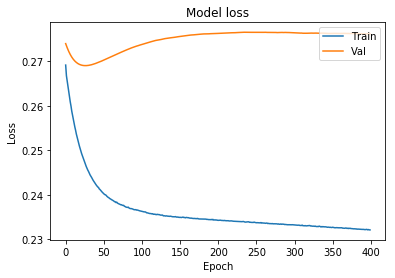

In [27]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [28]:
model = Sequential([
    Dense(28, activation='sigmoid', input_shape=(14,)),
    Dense(3, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])

In [29]:
epochs=400
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
#model.compile(optimizer='sgd',
#              loss='binary_crossentropy',
#              metrics=['accuracy'])
#opt = model.optimizers.Adam(learning_rate=0.1)
#model.compile(optimizer='adam',
#model.compile(optimizer=opt,
model.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [30]:
hist = model.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))

Train on 53 samples, validate on 11 samples
Epoch 1/400
53/53 [==============================] - 0s 8ms/step - loss: 0.2398 - accuracy: 0.1321 - val_loss: 0.2590 - val_accuracy: 0.0909
Epoch 2/400
53/53 [==============================] - 0s 258us/step - loss: 0.2396 - accuracy: 0.1321 - val_loss: 0.2591 - val_accuracy: 0.0909
Epoch 3/400
53/53 [==============================] - 0s 222us/step - loss: 0.2395 - accuracy: 0.1321 - val_loss: 0.2591 - val_accuracy: 0.0909
Epoch 4/400
53/53 [==============================] - 0s 248us/step - loss: 0.2393 - accuracy: 0.1321 - val_loss: 0.2593 - val_accuracy: 0.0909
Epoch 5/400
53/53 [==============================] - 0s 236us/step - loss: 0.2392 - accuracy: 0.1321 - val_loss: 0.2593 - val_accuracy: 0.0909
Epoch 6/400
53/53 [==============================] - 0s 234us/step - loss: 0.2390 - accuracy: 0.1321 - val_loss: 0.2594 - val_accuracy: 0.0909
Epoch 7/400
53/53 [==============================] - 0s 234us/step - loss: 0.2389 - accuracy: 0.1321

Epoch 58/400
53/53 [==============================] - 0s 242us/step - loss: 0.2360 - accuracy: 0.1509 - val_loss: 0.2637 - val_accuracy: 0.0909
Epoch 59/400
53/53 [==============================] - 0s 252us/step - loss: 0.2360 - accuracy: 0.1509 - val_loss: 0.2637 - val_accuracy: 0.0909
Epoch 60/400
53/53 [==============================] - 0s 232us/step - loss: 0.2360 - accuracy: 0.1509 - val_loss: 0.2638 - val_accuracy: 0.0909
Epoch 61/400
53/53 [==============================] - 0s 226us/step - loss: 0.2359 - accuracy: 0.1509 - val_loss: 0.2638 - val_accuracy: 0.0909
Epoch 62/400
53/53 [==============================] - 0s 232us/step - loss: 0.2359 - accuracy: 0.1509 - val_loss: 0.2639 - val_accuracy: 0.0909
Epoch 63/400
53/53 [==============================] - 0s 234us/step - loss: 0.2359 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy: 0.0909
Epoch 64/400
53/53 [==============================] - 0s 216us/step - loss: 0.2359 - accuracy: 0.1509 - val_loss: 0.2640 - val_accuracy:

Epoch 115/400
53/53 [==============================] - 0s 242us/step - loss: 0.2353 - accuracy: 0.1509 - val_loss: 0.2662 - val_accuracy: 0.0909
Epoch 116/400
53/53 [==============================] - 0s 249us/step - loss: 0.2352 - accuracy: 0.1509 - val_loss: 0.2662 - val_accuracy: 0.0909
Epoch 117/400
53/53 [==============================] - 0s 240us/step - loss: 0.2353 - accuracy: 0.1509 - val_loss: 0.2662 - val_accuracy: 0.0909
Epoch 118/400
53/53 [==============================] - 0s 253us/step - loss: 0.2352 - accuracy: 0.1509 - val_loss: 0.2663 - val_accuracy: 0.0909
Epoch 119/400
53/53 [==============================] - 0s 255us/step - loss: 0.2353 - accuracy: 0.1509 - val_loss: 0.2663 - val_accuracy: 0.0909
Epoch 120/400
53/53 [==============================] - 0s 254us/step - loss: 0.2352 - accuracy: 0.1509 - val_loss: 0.2663 - val_accuracy: 0.0909
Epoch 121/400
53/53 [==============================] - 0s 246us/step - loss: 0.2352 - accuracy: 0.1509 - val_loss: 0.2663 - val_ac

53/53 [==============================] - 0s 238us/step - loss: 0.2350 - accuracy: 0.1509 - val_loss: 0.2672 - val_accuracy: 0.0909
Epoch 172/400
53/53 [==============================] - 0s 236us/step - loss: 0.2350 - accuracy: 0.1509 - val_loss: 0.2672 - val_accuracy: 0.0909
Epoch 173/400
53/53 [==============================] - 0s 250us/step - loss: 0.2350 - accuracy: 0.1509 - val_loss: 0.2673 - val_accuracy: 0.0909
Epoch 174/400
53/53 [==============================] - 0s 242us/step - loss: 0.2349 - accuracy: 0.1509 - val_loss: 0.2673 - val_accuracy: 0.0909
Epoch 175/400
53/53 [==============================] - 0s 229us/step - loss: 0.2349 - accuracy: 0.1509 - val_loss: 0.2673 - val_accuracy: 0.0909
Epoch 176/400
53/53 [==============================] - 0s 249us/step - loss: 0.2350 - accuracy: 0.1509 - val_loss: 0.2673 - val_accuracy: 0.0909
Epoch 177/400
53/53 [==============================] - 0s 242us/step - loss: 0.2349 - accuracy: 0.1509 - val_loss: 0.2673 - val_accuracy: 0.0909

53/53 [==============================] - 0s 246us/step - loss: 0.2348 - accuracy: 0.1509 - val_loss: 0.2677 - val_accuracy: 0.0909
Epoch 228/400
53/53 [==============================] - 0s 232us/step - loss: 0.2348 - accuracy: 0.1509 - val_loss: 0.2677 - val_accuracy: 0.0909
Epoch 229/400
53/53 [==============================] - 0s 238us/step - loss: 0.2348 - accuracy: 0.1509 - val_loss: 0.2677 - val_accuracy: 0.0909
Epoch 230/400
53/53 [==============================] - 0s 235us/step - loss: 0.2347 - accuracy: 0.1509 - val_loss: 0.2677 - val_accuracy: 0.0909
Epoch 231/400
53/53 [==============================] - 0s 238us/step - loss: 0.2348 - accuracy: 0.1509 - val_loss: 0.2677 - val_accuracy: 0.0909
Epoch 232/400
53/53 [==============================] - 0s 241us/step - loss: 0.2348 - accuracy: 0.1509 - val_loss: 0.2677 - val_accuracy: 0.0909
Epoch 233/400
53/53 [==============================] - 0s 249us/step - loss: 0.2348 - accuracy: 0.1509 - val_loss: 0.2677 - val_accuracy: 0.0909

53/53 [==============================] - 0s 243us/step - loss: 0.2347 - accuracy: 0.1509 - val_loss: 0.2679 - val_accuracy: 0.0909
Epoch 284/400
53/53 [==============================] - 0s 221us/step - loss: 0.2346 - accuracy: 0.1509 - val_loss: 0.2679 - val_accuracy: 0.0909
Epoch 285/400
53/53 [==============================] - 0s 229us/step - loss: 0.2346 - accuracy: 0.1509 - val_loss: 0.2679 - val_accuracy: 0.0909
Epoch 286/400
53/53 [==============================] - 0s 238us/step - loss: 0.2346 - accuracy: 0.1509 - val_loss: 0.2679 - val_accuracy: 0.0909
Epoch 287/400
53/53 [==============================] - 0s 225us/step - loss: 0.2345 - accuracy: 0.1509 - val_loss: 0.2679 - val_accuracy: 0.0909
Epoch 288/400
53/53 [==============================] - 0s 236us/step - loss: 0.2346 - accuracy: 0.1509 - val_loss: 0.2679 - val_accuracy: 0.0909
Epoch 289/400
53/53 [==============================] - 0s 227us/step - loss: 0.2346 - accuracy: 0.1509 - val_loss: 0.2679 - val_accuracy: 0.0909

53/53 [==============================] - 0s 224us/step - loss: 0.2344 - accuracy: 0.1509 - val_loss: 0.2678 - val_accuracy: 0.0909
Epoch 340/400
53/53 [==============================] - 0s 239us/step - loss: 0.2344 - accuracy: 0.1509 - val_loss: 0.2678 - val_accuracy: 0.0909
Epoch 341/400
53/53 [==============================] - 0s 219us/step - loss: 0.2344 - accuracy: 0.1509 - val_loss: 0.2678 - val_accuracy: 0.0909
Epoch 342/400
53/53 [==============================] - 0s 238us/step - loss: 0.2344 - accuracy: 0.1509 - val_loss: 0.2678 - val_accuracy: 0.0909
Epoch 343/400
53/53 [==============================] - 0s 224us/step - loss: 0.2344 - accuracy: 0.1509 - val_loss: 0.2678 - val_accuracy: 0.0909
Epoch 344/400
53/53 [==============================] - 0s 238us/step - loss: 0.2344 - accuracy: 0.1509 - val_loss: 0.2678 - val_accuracy: 0.0909
Epoch 345/400
53/53 [==============================] - 0s 218us/step - loss: 0.2343 - accuracy: 0.1509 - val_loss: 0.2678 - val_accuracy: 0.0909

53/53 [==============================] - 0s 223us/step - loss: 0.2342 - accuracy: 0.1509 - val_loss: 0.2678 - val_accuracy: 0.0909
Epoch 396/400
53/53 [==============================] - 0s 241us/step - loss: 0.2343 - accuracy: 0.1509 - val_loss: 0.2678 - val_accuracy: 0.0909
Epoch 397/400
53/53 [==============================] - 0s 236us/step - loss: 0.2341 - accuracy: 0.1509 - val_loss: 0.2678 - val_accuracy: 0.0909
Epoch 398/400
53/53 [==============================] - 0s 213us/step - loss: 0.2342 - accuracy: 0.1509 - val_loss: 0.2678 - val_accuracy: 0.0909
Epoch 399/400
53/53 [==============================] - 0s 235us/step - loss: 0.2342 - accuracy: 0.1509 - val_loss: 0.2679 - val_accuracy: 0.0909
Epoch 400/400
53/53 [==============================] - 0s 232us/step - loss: 0.2341 - accuracy: 0.1509 - val_loss: 0.2679 - val_accuracy: 0.0909


In [31]:
model.evaluate(X_test, Y_test)[1]

12/12 [==============================] - 0s 129us/step


0.25

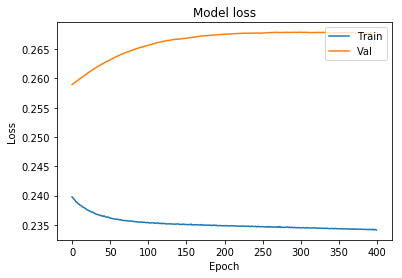

In [32]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [33]:
from keras.models import Sequential

In [34]:
#model = Sequential()
weights = model.get_weights()

In [35]:
print(weights)

[array([[ 0.10705918, -0.00433755,  0.14996198, -0.09931958,  0.07365924,
        -0.12172818,  0.12975499, -0.15646541,  0.02608946, -0.13230294,
         0.0487676 ,  0.29092613, -0.32301176,  0.32026526, -0.19112307,
        -0.2316666 , -0.36829644, -0.11833727,  0.07801741, -0.15732987,
        -0.23896013,  0.28012696,  0.30081952,  0.02862462,  0.18596521,
         0.00651035,  0.02812055, -0.01522085],
       [-0.19253488, -0.12784502,  0.06557551,  0.06176928, -0.07588309,
         0.08147258,  0.29388502,  0.03360656, -0.00893784,  0.21474203,
        -0.3320076 , -0.08372605, -0.22653794, -0.02757651, -0.24595495,
         0.22830118,  0.17865899,  0.27883467, -0.0658446 , -0.15101938,
         0.08885965, -0.10138834,  0.13411473,  0.24144319,  0.3702567 ,
        -0.21158212, -0.13978328, -0.33739993],
       [-0.19793656, -0.09266001, -0.12055886, -0.23996653,  0.00153852,
        -0.01737484, -0.34159717,  0.19313297,  0.09171218,  0.338919  ,
         0.04065786,  0.281

In [36]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 28)                420       
_________________________________________________________________
dense_62 (Dense)             (None, 3)                 87        
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 4         
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [37]:
Xnew = [[2002, 1.9, 1], [2012, 2, 1], [2015, 2, 4]]
Xnew = [2002, 1.9, 1]
Xnew

[2002, 1.9, 1]

In [38]:
df_t = pd.read_excel(open('Cost.xls', 'rb'), sheet_name='Test1')
df_t.head()

,Unit Name,Type Unit,Region,Lease/ Own,Water Depth\n(meters),Contracting Date,"Contract (EPC, CL, PS, TK)","Local Content Requirment (H,M,A,L, N)","Technology Novelt (H,M,A,L,N)","FEED Detail (H,M,A,L,N)","FEED Detail (H,M,A,L,N).1",Lessons Learned,"Company (NOC, IOC, OC)",Planned_Duration,Planned_Cost,Schedule_Overrun,Cost_Overrun
0,Stybarrow Venture MV16,1,2,1,825,4096,1,3,3,4,4,2,2,702,0.598425,-0.143875,0.270000
1,Alima FPU,2,1,2,600,3894,1,2,1,4,4,3,2,994,1.133000,-0.022133,0.350000
2,Prelude,6,2,2,250,5988,1,3,5,5,5,1,2,2229,11.160000,0.243158,0.344086
3,CLOV FPSO,1,1,2,1290,5708,1,3,2,5,5,4,2,1383,1.800000,0.007954,0.055556
4,Dalia,1,1,2,1360,3046,1,4,3,2,2,5,2,1306,3.400000,0.010720,0.176471


In [39]:
dataset_t = df_t.values
Xnew = dataset_t[:,1:15]
Xnew


array([[1, 2, 1, ..., 2, 702, 0.5984251968503937],
       [2, 1, 2, ..., 2, 994, 1.133],
       [6, 2, 2, ..., 2, 2229, 11.16],
       ...,
       [3, 5, 2, ..., 3, 887, 0.85],
       [3, 5, 2, ..., 3, 1119, 4.41],
       [3, 5, 2, ..., 2, 1529, 4.0]], dtype=object)

In [40]:
min_max_scaler = preprocessing.MinMaxScaler()
Xnew_scale = min_max_scaler.fit_transform(Xnew)

In [41]:
ynew1 = model.predict(Xnew_scale)

In [42]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew[%s] = %s " % (loop,Xnew[loop],loop,ynew1[loop]))

The values of Xnew and its predicted yhat
Xnew[0] = [1 2 1 825 4096 1 3 3 4 4 2 2 702 0.5984251968503937], ynew[0] = [0.41349632] 
Xnew[1] = [2 1 2 600 3894 1 2 1 4 4 3 2 994 1.133], ynew[1] = [0.41227418] 
Xnew[2] = [6 2 2 250 5988 1 3 5 5 5 1 2 2229 11.16], ynew[2] = [0.40125507] 
Xnew[3] = [1 1 2 1290 5708 1 3 2 5 5 4 2 1383 1.8], ynew[3] = [0.4088931] 
Xnew[4] = [1 1 2 1360 3046 1 4 3 2 2 5 2 1306 3.4], ynew[4] = [0.4171384] 
Xnew[5] = [1 1 2 1350 1277 1 4 3 1 1 1 2 823 2.5], ynew[5] = [0.42051378] 
Xnew[6] = [1 1 2 1250 2930 1 3 1 2 2 5 2 1071 0.76], ynew[6] = [0.4192915] 
Xnew[7] = [1 1 1 728 4040 1 4 1 3 3 3 2 797 0.75], ynew[7] = [0.41702345] 
Xnew[8] = [1 1 1 720 4040 1 4 1 3 3 3 2 797 0.75], ynew[8] = [0.41701046] 
Xnew[9] = [1 1 2 1350 3318 1 3 3 5 5 2 2 1124 1.73], ynew[9] = [0.41133654] 
Xnew[10] = [1 1 2 2000 4929 1 5 5 1 1 2 2 1249 10.0], ynew[10] = [0.41355482] 
Xnew[11] = [1 1 1 1425 6791 1 4 1 5 5 2 2 1092 5.0], ynew[11] = [0.41079634] 
Xnew[12] = [1 1 2 1433 3713 1 2

In [43]:
ynew1

array([[0.41349632],
       [0.41227418],
       [0.40125507],
       [0.4088931 ],
       [0.4171384 ],
       [0.42051378],
       [0.4192915 ],
       [0.41702345],
       [0.41701046],
       [0.41133654],
       [0.41355482],
       [0.41079634],
       [0.41690737],
       [0.41281635],
       [0.41563737],
       [0.4122378 ],
       [0.417314  ],
       [0.41862553],
       [0.40326557],
       [0.40697348],
       [0.41051614],
       [0.41364956],
       [0.4148716 ],
       [0.4149862 ],
       [0.41055566],
       [0.4163385 ],
       [0.40904072],
       [0.41017574],
       [0.4138521 ],
       [0.414663  ],
       [0.410422  ],
       [0.4213841 ],
       [0.41490817],
       [0.41286004],
       [0.42038614],
       [0.41863525],
       [0.41171414],
       [0.41182214],
       [0.4099511 ],
       [0.41015133],
       [0.4102486 ],
       [0.41140586],
       [0.4097401 ],
       [0.40924987],
       [0.4005535 ],
       [0.40545967],
       [0.41162992],
       [0.410

In [44]:
ynew3 = model3.predict(Xnew_scale)

In [45]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew[%s] = %s " % (loop,Xnew[loop],loop,ynew3[loop]))

The values of Xnew and its predicted yhat
Xnew[0] = [1 2 1 825 4096 1 3 3 4 4 2 2 702 0.5984251968503937], ynew[0] = [0.4312775] 
Xnew[1] = [2 1 2 600 3894 1 2 1 4 4 3 2 994 1.133], ynew[1] = [0.4199583] 
Xnew[2] = [6 2 2 250 5988 1 3 5 5 5 1 2 2229 11.16], ynew[2] = [0.41889444] 
Xnew[3] = [1 1 2 1290 5708 1 3 2 5 5 4 2 1383 1.8], ynew[3] = [0.41334358] 
Xnew[4] = [1 1 2 1360 3046 1 4 3 2 2 5 2 1306 3.4], ynew[4] = [0.41221893] 
Xnew[5] = [1 1 2 1350 1277 1 4 3 1 1 1 2 823 2.5], ynew[5] = [0.42492908] 
Xnew[6] = [1 1 2 1250 2930 1 3 1 2 2 5 2 1071 0.76], ynew[6] = [0.41286176] 
Xnew[7] = [1 1 1 728 4040 1 4 1 3 3 3 2 797 0.75], ynew[7] = [0.42474312] 
Xnew[8] = [1 1 1 720 4040 1 4 1 3 3 3 2 797 0.75], ynew[8] = [0.42477196] 
Xnew[9] = [1 1 2 1350 3318 1 3 3 5 5 2 2 1124 1.73], ynew[9] = [0.42112315] 
Xnew[10] = [1 1 2 2000 4929 1 5 5 1 1 2 2 1249 10.0], ynew[10] = [0.41674557] 
Xnew[11] = [1 1 1 1425 6791 1 4 1 5 5 2 2 1092 5.0], ynew[11] = [0.4218857] 
Xnew[12] = [1 1 2 1433 3713 1 2

In [46]:
ynew3

array([[0.4312775 ],
       [0.4199583 ],
       [0.41889444],
       [0.41334358],
       [0.41221893],
       [0.42492908],
       [0.41286176],
       [0.42474312],
       [0.42477196],
       [0.42112315],
       [0.41674557],
       [0.4218857 ],
       [0.4216423 ],
       [0.42239922],
       [0.4235803 ],
       [0.4105074 ],
       [0.4198017 ],
       [0.41916624],
       [0.42165658],
       [0.42077568],
       [0.4243414 ],
       [0.41344747],
       [0.41149133],
       [0.41512093],
       [0.42333287],
       [0.41227424],
       [0.41198736],
       [0.40976977],
       [0.42905313],
       [0.40556222],
       [0.41529402],
       [0.4400694 ],
       [0.43591705],
       [0.4234288 ],
       [0.43863997],
       [0.43714243],
       [0.43435022],
       [0.4317183 ],
       [0.42864543],
       [0.42142153],
       [0.41566223],
       [0.4225654 ],
       [0.4163721 ],
       [0.42449698],
       [0.4078379 ],
       [0.42130286],
       [0.40119866],
       [0.398

In [47]:
dataset

array([['Stybarrow Venture MV16', 1, 2, ..., 0.5984251968503937,
        -0.14387464387464388, 0.2699999999999999],
       ['Alima FPU', 2, 1, ..., 1.133, -0.022132796780684104,
        0.35000000000000014],
       ['Prelude', 6, 2, ..., 11.16, 0.24315836698070883,
        0.3440860215053763],
       ...,
       ['Neptune TLP', 3, 5, ..., 0.85, 0.23449830890642615,
        0.47882352941176465],
       ['Shenzi TLP', 3, 5, ..., 4.41, -0.08847184986595175, 0.0],
       ['Big Foot', 3, 5, ..., 4.0, 0.9489862655330281,
        0.2749999999999999]], dtype=object)

Use only Region, Water Depth, Technology Novelty, and Lessons Learned

In [48]:
X = dataset[:,[2,4,8,11]]

In [49]:
X

array([[2, 825, 3, 2],
       [1, 600, 1, 3],
       [2, 250, 5, 1],
       [1, 1290, 2, 4],
       [1, 1360, 3, 5],
       [1, 1350, 3, 1],
       [1, 1250, 1, 5],
       [1, 728, 1, 3],
       [1, 720, 1, 3],
       [1, 1350, 3, 2],
       [1, 2000, 5, 2],
       [1, 1425, 1, 2],
       [1, 1433, 2, 2],
       [1, 1325, 2, 1],
       [1, 1250, 3, 1],
       [1, 1600, 2, 3],
       [1, 1180, 2, 2],
       [1, 1250, 2, 3],
       [2, 250, 5, 2],
       [2, 200, 4, 4],
       [2, 340, 2, 2],
       [3, 1240, 1, 4],
       [3, 800, 1, 4],
       [3, 1040, 1, 2],
       [3, 1080, 2, 1],
       [3, 1300, 1, 4],
       [3, 2200, 1, 5],
       [3, 1170, 1, 2],
       [3, 1780, 5, 1],
       [3, 1315, 2, 5],
       [3, 765, 2, 4],
       [4, 90, 5, 1],
       [4, 120, 5, 1],
       [5, 2900, 4, 2],
       [6, 300, 4, 1],
       [7, 125, 5, 1],
       [6, 400, 5, 1],
       [6, 410, 2, 2],
       [6, 370, 4, 1],
       [6, 424, 2, 1],
       [1, 65, 2, 3],
       [1, 56, 2, 1],
       [1, 56, 

In [50]:
Y = dataset[:,16]

In [51]:
Y

array([0.2699999999999999, 0.35000000000000014, 0.3440860215053763,
       0.05555555555555548, 0.17647058823529416, 0.11999999999999993,
       0.13333333333333341, 0.0, 0.0, 0.85, 0.4, 0.0, 0.3,
       1.5499999999999998, 0.5000000000000001, -0.09375,
       0.5700000000000003, 0.13333333333333322, 0.32352941176470584,
       0.012027952212040005, 0.3333333333333333, 0.4112903225806451,
       0.3846153846153846, 0.3846153846153846, 1.35, 0.004184100418409952,
       0.59441052, 0.2538461538461537, 1.3199999999999996,
       0.971383147853736, 0.00554235946159946, 0.3076923076923076,
       0.19999999999999996, 0.31099999999999994, 0.3600000000000001, 0.62,
       0.52, 0.36974789915966394, 0.7, 0.1924686192468619,
       0.3999999999999999, 0.08333333333333341, 0.08333333333333341,
       0.8500000000000002, 0.0, 0.3235294117647059, 0.2499999999999999,
       0.0714285714285715, 0.434878587196468, 1.35, 0.0, 0.95, 0.0,
       2.6800000000000006, 0.0, 0.0, 0.7368421052631579,
       

In [52]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [53]:
X_scale

array([[0.16666667, 0.27039381, 0.5       , 0.25      ],
       [0.        , 0.19127989, 0.        , 0.5       ],
       [0.16666667, 0.06821378, 1.        , 0.        ],
       [0.        , 0.43389592, 0.25      , 0.75      ],
       [0.        , 0.45850914, 0.5       , 1.        ],
       [0.        , 0.45499297, 0.5       , 0.        ],
       [0.        , 0.41983122, 0.        , 1.        ],
       [0.        , 0.23628692, 0.        , 0.5       ],
       [0.        , 0.23347398, 0.        , 0.5       ],
       [0.        , 0.45499297, 0.5       , 0.25      ],
       [0.        , 0.6835443 , 1.        , 0.25      ],
       [0.        , 0.48136428, 0.        , 0.25      ],
       [0.        , 0.48417722, 0.25      , 0.25      ],
       [0.        , 0.44620253, 0.25      , 0.        ],
       [0.        , 0.41983122, 0.5       , 0.        ],
       [0.        , 0.54289733, 0.25      , 0.5       ],
       [0.        , 0.395218  , 0.25      , 0.25      ],
       [0.        , 0.41983122,

In [54]:
min_max_scaler2 = preprocessing.MinMaxScaler()
#Y_scale = min_max_scaler2.fit_transform(Y)

In [55]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

In [56]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [57]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(53, 4) (11, 4) (12, 4) (53,) (11,) (12,)


In [58]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [59]:
# define 10-fold cross validation test harness
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

In [60]:
for train, test in kfold.split(X_scale, Y):
# create model
	model4 = Sequential()
	model4.add(Dense(12, input_dim=4, activation='relu'))
	model4.add(Dense(8, activation='relu'))
	model4.add(Dense(1, activation='sigmoid'))
	# Compile model
	model4.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model4.fit(X_scale[train], Y[train], epochs=150, batch_size=9, verbose=0)
	# evaluate the model
	scores = model4.evaluate(X_scale[train], Y[train], verbose=0)
	print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 14.71%
accuracy: 11.76%
accuracy: 16.18%
accuracy: 14.71%
accuracy: 16.18%
accuracy: 14.71%
accuracy: 14.49%
accuracy: 10.14%
accuracy: 11.59%
accuracy: 15.94%
14.04% (+/- 2.02%)


In [61]:
cvscores2 = []
for train, test in kfold.split(X_train, Y_train):
# create model
    model5 = Sequential([
        Dense(6, activation='sigmoid', input_shape=(4,)),
        #    Dense(3, activation='sigmoid'),
        Dense(1, activation='sigmoid'),
    ])
    epochs=400
    learning_rate = 0.1
    decay_rate = learning_rate / epochs
    momentum = 0.8
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model5.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
    hist3 = model5.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))
    scores = model5.evaluate(X_scale[train], Y[train], verbose=0)
    cvscores2.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores2), np.std(cvscores)))

Train on 53 samples, validate on 11 samples
Epoch 1/400
53/53 [==============================] - 0s 8ms/step - loss: 0.3264 - accuracy: 0.0189 - val_loss: 0.2025 - val_accuracy: 0.0000e+00
Epoch 2/400
53/53 [==============================] - 0s 233us/step - loss: 0.3080 - accuracy: 0.0189 - val_loss: 0.1968 - val_accuracy: 0.0000e+00
Epoch 3/400
53/53 [==============================] - 0s 210us/step - loss: 0.3055 - accuracy: 0.0189 - val_loss: 0.1905 - val_accuracy: 0.0000e+00
Epoch 4/400
53/53 [==============================] - 0s 249us/step - loss: 0.3027 - accuracy: 0.0189 - val_loss: 0.1724 - val_accuracy: 0.0909
Epoch 5/400
53/53 [==============================] - 0s 273us/step - loss: 0.3015 - accuracy: 0.0377 - val_loss: 0.0746 - val_accuracy: 0.2727
Epoch 6/400
53/53 [==============================] - 0s 240us/step - loss: 0.2881 - accuracy: 0.1321 - val_loss: 0.0753 - val_accuracy: 0.2727
Epoch 7/400
53/53 [==============================] - 0s 218us/step - loss: 0.2879 - accu

53/53 [==============================] - 0s 206us/step - loss: 0.2859 - accuracy: 0.1321 - val_loss: 0.0911 - val_accuracy: 0.2727
Epoch 58/400
53/53 [==============================] - 0s 238us/step - loss: 0.2859 - accuracy: 0.1321 - val_loss: 0.0912 - val_accuracy: 0.2727
Epoch 59/400
53/53 [==============================] - 0s 231us/step - loss: 0.2860 - accuracy: 0.1321 - val_loss: 0.0912 - val_accuracy: 0.2727
Epoch 60/400
53/53 [==============================] - 0s 231us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0913 - val_accuracy: 0.2727
Epoch 61/400
53/53 [==============================] - 0s 249us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0914 - val_accuracy: 0.2727
Epoch 62/400
53/53 [==============================] - 0s 214us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0916 - val_accuracy: 0.2727
Epoch 63/400
53/53 [==============================] - 0s 207us/step - loss: 0.2859 - accuracy: 0.1321 - val_loss: 0.0916 - val_accuracy: 0.2727
Epoch

Epoch 114/400
53/53 [==============================] - 0s 229us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0942 - val_accuracy: 0.2727
Epoch 115/400
53/53 [==============================] - 0s 223us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727
Epoch 116/400
53/53 [==============================] - 0s 224us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 117/400
53/53 [==============================] - 0s 212us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727
Epoch 118/400
53/53 [==============================] - 0s 236us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 119/400
53/53 [==============================] - 0s 228us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727
Epoch 120/400
53/53 [==============================] - 0s 220us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0944 - val_ac

53/53 [==============================] - 0s 219us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0941 - val_accuracy: 0.2727
Epoch 171/400
53/53 [==============================] - 0s 218us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0941 - val_accuracy: 0.2727
Epoch 172/400
53/53 [==============================] - 0s 213us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0942 - val_accuracy: 0.2727
Epoch 173/400
53/53 [==============================] - 0s 211us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0941 - val_accuracy: 0.2727
Epoch 174/400
53/53 [==============================] - 0s 212us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0941 - val_accuracy: 0.2727
Epoch 175/400
53/53 [==============================] - 0s 218us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0941 - val_accuracy: 0.2727
Epoch 176/400
53/53 [==============================] - 0s 214us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0941 - val_accuracy: 0.2727

53/53 [==============================] - 0s 216us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 227/400
53/53 [==============================] - 0s 219us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 228/400
53/53 [==============================] - 0s 203us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727
Epoch 229/400
53/53 [==============================] - 0s 211us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727
Epoch 230/400
53/53 [==============================] - 0s 213us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 231/400
53/53 [==============================] - 0s 218us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727
Epoch 232/400
53/53 [==============================] - 0s 215us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727

53/53 [==============================] - 0s 222us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 283/400
53/53 [==============================] - 0s 229us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 284/400
53/53 [==============================] - 0s 197us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 285/400
53/53 [==============================] - 0s 210us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727
Epoch 286/400
53/53 [==============================] - 0s 219us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727
Epoch 287/400
53/53 [==============================] - 0s 209us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 288/400
53/53 [==============================] - 0s 210us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727

53/53 [==============================] - 0s 218us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0941 - val_accuracy: 0.2727
Epoch 339/400
53/53 [==============================] - 0s 221us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0941 - val_accuracy: 0.2727
Epoch 340/400
53/53 [==============================] - 0s 198us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0942 - val_accuracy: 0.2727
Epoch 341/400
53/53 [==============================] - 0s 214us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0942 - val_accuracy: 0.2727
Epoch 342/400
53/53 [==============================] - 0s 214us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 343/400
53/53 [==============================] - 0s 216us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 344/400
53/53 [==============================] - 0s 207us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727

53/53 [==============================] - 0s 223us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727
Epoch 395/400
53/53 [==============================] - 0s 208us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 396/400
53/53 [==============================] - 0s 196us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 397/400
53/53 [==============================] - 0s 215us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 398/400
53/53 [==============================] - 0s 219us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 399/400
53/53 [==============================] - 0s 227us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 400/400
53/53 [==============================] - 0s 203us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727

53/53 [==============================] - 0s 217us/step - loss: 0.3037 - accuracy: 0.0000e+00 - val_loss: 0.1782 - val_accuracy: 0.0000e+00
Epoch 49/400
53/53 [==============================] - 0s 210us/step - loss: 0.3028 - accuracy: 0.0000e+00 - val_loss: 0.1753 - val_accuracy: 0.0000e+00
Epoch 50/400
53/53 [==============================] - 0s 207us/step - loss: 0.3018 - accuracy: 0.0000e+00 - val_loss: 0.1726 - val_accuracy: 0.0000e+00
Epoch 51/400
53/53 [==============================] - 0s 214us/step - loss: 0.3009 - accuracy: 0.0000e+00 - val_loss: 0.1698 - val_accuracy: 0.0000e+00
Epoch 52/400
53/53 [==============================] - 0s 214us/step - loss: 0.2999 - accuracy: 0.0000e+00 - val_loss: 0.1671 - val_accuracy: 0.0000e+00
Epoch 53/400
53/53 [==============================] - 0s 214us/step - loss: 0.2990 - accuracy: 0.0000e+00 - val_loss: 0.1646 - val_accuracy: 0.0000e+00
Epoch 54/400
53/53 [==============================] - 0s 210us/step - loss: 0.2982 - accuracy: 0.0000

53/53 [==============================] - 0s 229us/step - loss: 0.2860 - accuracy: 0.1321 - val_loss: 0.1078 - val_accuracy: 0.2727
Epoch 105/400
53/53 [==============================] - 0s 215us/step - loss: 0.2859 - accuracy: 0.1321 - val_loss: 0.1074 - val_accuracy: 0.2727
Epoch 106/400
53/53 [==============================] - 0s 215us/step - loss: 0.2859 - accuracy: 0.1321 - val_loss: 0.1070 - val_accuracy: 0.2727
Epoch 107/400
53/53 [==============================] - 0s 224us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.1066 - val_accuracy: 0.2727
Epoch 108/400
53/53 [==============================] - 0s 249us/step - loss: 0.2860 - accuracy: 0.1321 - val_loss: 0.1063 - val_accuracy: 0.2727
Epoch 109/400
53/53 [==============================] - 0s 212us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.1059 - val_accuracy: 0.2727
Epoch 110/400
53/53 [==============================] - 0s 224us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.1055 - val_accuracy: 0.2727

53/53 [==============================] - 0s 204us/step - loss: 0.2872 - accuracy: 0.1321 - val_loss: 0.0812 - val_accuracy: 0.2727
Epoch 161/400
53/53 [==============================] - 0s 212us/step - loss: 0.2872 - accuracy: 0.1321 - val_loss: 0.0815 - val_accuracy: 0.2727
Epoch 162/400
53/53 [==============================] - 0s 202us/step - loss: 0.2873 - accuracy: 0.1321 - val_loss: 0.0817 - val_accuracy: 0.2727
Epoch 163/400
53/53 [==============================] - 0s 209us/step - loss: 0.2871 - accuracy: 0.1321 - val_loss: 0.0820 - val_accuracy: 0.2727
Epoch 164/400
53/53 [==============================] - 0s 209us/step - loss: 0.2871 - accuracy: 0.1321 - val_loss: 0.0821 - val_accuracy: 0.2727
Epoch 165/400
53/53 [==============================] - 0s 216us/step - loss: 0.2872 - accuracy: 0.1321 - val_loss: 0.0824 - val_accuracy: 0.2727
Epoch 166/400
53/53 [==============================] - 0s 210us/step - loss: 0.2871 - accuracy: 0.1321 - val_loss: 0.0826 - val_accuracy: 0.2727

53/53 [==============================] - 0s 210us/step - loss: 0.2866 - accuracy: 0.1321 - val_loss: 0.0894 - val_accuracy: 0.2727
Epoch 217/400
53/53 [==============================] - 0s 213us/step - loss: 0.2866 - accuracy: 0.1321 - val_loss: 0.0894 - val_accuracy: 0.2727
Epoch 218/400
53/53 [==============================] - 0s 197us/step - loss: 0.2866 - accuracy: 0.1321 - val_loss: 0.0895 - val_accuracy: 0.2727
Epoch 219/400
53/53 [==============================] - 0s 203us/step - loss: 0.2865 - accuracy: 0.1321 - val_loss: 0.0896 - val_accuracy: 0.2727
Epoch 220/400
53/53 [==============================] - 0s 204us/step - loss: 0.2865 - accuracy: 0.1321 - val_loss: 0.0897 - val_accuracy: 0.2727
Epoch 221/400
53/53 [==============================] - 0s 214us/step - loss: 0.2865 - accuracy: 0.1321 - val_loss: 0.0897 - val_accuracy: 0.2727
Epoch 222/400
53/53 [==============================] - 0s 212us/step - loss: 0.2865 - accuracy: 0.1321 - val_loss: 0.0898 - val_accuracy: 0.2727

53/53 [==============================] - 0s 214us/step - loss: 0.2865 - accuracy: 0.1321 - val_loss: 0.0920 - val_accuracy: 0.2727
Epoch 273/400
53/53 [==============================] - 0s 222us/step - loss: 0.2864 - accuracy: 0.1321 - val_loss: 0.0921 - val_accuracy: 0.2727
Epoch 274/400
53/53 [==============================] - 0s 195us/step - loss: 0.2864 - accuracy: 0.1321 - val_loss: 0.0921 - val_accuracy: 0.2727
Epoch 275/400
53/53 [==============================] - 0s 210us/step - loss: 0.2865 - accuracy: 0.1321 - val_loss: 0.0923 - val_accuracy: 0.2727
Epoch 276/400
53/53 [==============================] - 0s 210us/step - loss: 0.2865 - accuracy: 0.1321 - val_loss: 0.0923 - val_accuracy: 0.2727
Epoch 277/400
53/53 [==============================] - 0s 208us/step - loss: 0.2865 - accuracy: 0.1321 - val_loss: 0.0923 - val_accuracy: 0.2727
Epoch 278/400
53/53 [==============================] - 0s 207us/step - loss: 0.2864 - accuracy: 0.1321 - val_loss: 0.0924 - val_accuracy: 0.2727

53/53 [==============================] - 0s 231us/step - loss: 0.2864 - accuracy: 0.1321 - val_loss: 0.0927 - val_accuracy: 0.2727
Epoch 329/400
53/53 [==============================] - 0s 229us/step - loss: 0.2865 - accuracy: 0.1321 - val_loss: 0.0927 - val_accuracy: 0.2727
Epoch 330/400
53/53 [==============================] - 0s 209us/step - loss: 0.2864 - accuracy: 0.1321 - val_loss: 0.0927 - val_accuracy: 0.2727
Epoch 331/400
53/53 [==============================] - 0s 234us/step - loss: 0.2864 - accuracy: 0.1321 - val_loss: 0.0927 - val_accuracy: 0.2727
Epoch 332/400
53/53 [==============================] - 0s 215us/step - loss: 0.2864 - accuracy: 0.1321 - val_loss: 0.0927 - val_accuracy: 0.2727
Epoch 333/400
53/53 [==============================] - 0s 208us/step - loss: 0.2864 - accuracy: 0.1321 - val_loss: 0.0927 - val_accuracy: 0.2727
Epoch 334/400
53/53 [==============================] - 0s 201us/step - loss: 0.2864 - accuracy: 0.1321 - val_loss: 0.0927 - val_accuracy: 0.2727

53/53 [==============================] - 0s 214us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0935 - val_accuracy: 0.2727
Epoch 385/400
53/53 [==============================] - 0s 200us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0935 - val_accuracy: 0.2727
Epoch 386/400
53/53 [==============================] - 0s 223us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0935 - val_accuracy: 0.2727
Epoch 387/400
53/53 [==============================] - 0s 195us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0935 - val_accuracy: 0.2727
Epoch 388/400
53/53 [==============================] - 0s 204us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0935 - val_accuracy: 0.2727
Epoch 389/400
53/53 [==============================] - 0s 218us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0935 - val_accuracy: 0.2727
Epoch 390/400
53/53 [==============================] - 0s 201us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0936 - val_accuracy: 0.2727

53/53 [==============================] - 0s 223us/step - loss: 0.2862 - accuracy: 0.1321 - val_loss: 0.1043 - val_accuracy: 0.2727
Epoch 41/400
53/53 [==============================] - 0s 221us/step - loss: 0.2860 - accuracy: 0.1321 - val_loss: 0.1041 - val_accuracy: 0.2727
Epoch 42/400
53/53 [==============================] - 0s 211us/step - loss: 0.2861 - accuracy: 0.1321 - val_loss: 0.1037 - val_accuracy: 0.2727
Epoch 43/400
53/53 [==============================] - 0s 215us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.1034 - val_accuracy: 0.2727
Epoch 44/400
53/53 [==============================] - 0s 215us/step - loss: 0.2860 - accuracy: 0.1321 - val_loss: 0.1032 - val_accuracy: 0.2727
Epoch 45/400
53/53 [==============================] - 0s 219us/step - loss: 0.2859 - accuracy: 0.1321 - val_loss: 0.1028 - val_accuracy: 0.2727
Epoch 46/400
53/53 [==============================] - 0s 215us/step - loss: 0.2859 - accuracy: 0.1321 - val_loss: 0.1025 - val_accuracy: 0.2727
Epoch

Epoch 97/400
53/53 [==============================] - 0s 225us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0961 - val_accuracy: 0.2727
Epoch 98/400
53/53 [==============================] - 0s 208us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0960 - val_accuracy: 0.2727
Epoch 99/400
53/53 [==============================] - 0s 211us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0959 - val_accuracy: 0.2727
Epoch 100/400
53/53 [==============================] - 0s 203us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0960 - val_accuracy: 0.2727
Epoch 101/400
53/53 [==============================] - 0s 210us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0961 - val_accuracy: 0.2727
Epoch 102/400
53/53 [==============================] - 0s 214us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0960 - val_accuracy: 0.2727
Epoch 103/400
53/53 [==============================] - 0s 212us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0960 - val_accur

53/53 [==============================] - 0s 218us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0950 - val_accuracy: 0.2727
Epoch 154/400
53/53 [==============================] - 0s 217us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0949 - val_accuracy: 0.2727
Epoch 155/400
53/53 [==============================] - 0s 211us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0949 - val_accuracy: 0.2727
Epoch 156/400
53/53 [==============================] - 0s 210us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0949 - val_accuracy: 0.2727
Epoch 157/400
53/53 [==============================] - 0s 207us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0950 - val_accuracy: 0.2727
Epoch 158/400
53/53 [==============================] - 0s 211us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0949 - val_accuracy: 0.2727
Epoch 159/400
53/53 [==============================] - 0s 216us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0950 - val_accuracy: 0.2727

53/53 [==============================] - 0s 219us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0947 - val_accuracy: 0.2727
Epoch 210/400
53/53 [==============================] - 0s 202us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0947 - val_accuracy: 0.2727
Epoch 211/400
53/53 [==============================] - 0s 219us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727
Epoch 212/400
53/53 [==============================] - 0s 211us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727
Epoch 213/400
53/53 [==============================] - 0s 214us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0947 - val_accuracy: 0.2727
Epoch 214/400
53/53 [==============================] - 0s 212us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0949 - val_accuracy: 0.2727
Epoch 215/400
53/53 [==============================] - 0s 208us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727

53/53 [==============================] - 0s 212us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0947 - val_accuracy: 0.2727
Epoch 266/400
53/53 [==============================] - 0s 211us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0947 - val_accuracy: 0.2727
Epoch 267/400
53/53 [==============================] - 0s 203us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.0947 - val_accuracy: 0.2727
Epoch 268/400
53/53 [==============================] - 0s 208us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727
Epoch 269/400
53/53 [==============================] - 0s 212us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0947 - val_accuracy: 0.2727
Epoch 270/400
53/53 [==============================] - 0s 218us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0947 - val_accuracy: 0.2727
Epoch 271/400
53/53 [==============================] - 0s 208us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727

53/53 [==============================] - 0s 212us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0947 - val_accuracy: 0.2727
Epoch 322/400
53/53 [==============================] - 0s 214us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 323/400
53/53 [==============================] - 0s 228us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 324/400
53/53 [==============================] - 0s 192us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 325/400
53/53 [==============================] - 0s 209us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 326/400
53/53 [==============================] - 0s 216us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 327/400
53/53 [==============================] - 0s 213us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727

53/53 [==============================] - 0s 214us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 378/400
53/53 [==============================] - 0s 217us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 379/400
53/53 [==============================] - 0s 203us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 380/400
53/53 [==============================] - 0s 203us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 381/400
53/53 [==============================] - 0s 213us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 382/400
53/53 [==============================] - 0s 212us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 383/400
53/53 [==============================] - 0s 216us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727

53/53 [==============================] - 0s 227us/step - loss: 0.2882 - accuracy: 0.1321 - val_loss: 0.0721 - val_accuracy: 0.2727
Epoch 34/400
53/53 [==============================] - 0s 205us/step - loss: 0.2881 - accuracy: 0.1321 - val_loss: 0.0727 - val_accuracy: 0.2727
Epoch 35/400
53/53 [==============================] - 0s 211us/step - loss: 0.2880 - accuracy: 0.1321 - val_loss: 0.0733 - val_accuracy: 0.2727
Epoch 36/400
53/53 [==============================] - 0s 254us/step - loss: 0.2877 - accuracy: 0.1321 - val_loss: 0.0739 - val_accuracy: 0.2727
Epoch 37/400
53/53 [==============================] - 0s 269us/step - loss: 0.2879 - accuracy: 0.1321 - val_loss: 0.0745 - val_accuracy: 0.2727
Epoch 38/400
53/53 [==============================] - 0s 264us/step - loss: 0.2875 - accuracy: 0.1321 - val_loss: 0.0751 - val_accuracy: 0.2727
Epoch 39/400
53/53 [==============================] - 0s 207us/step - loss: 0.2874 - accuracy: 0.1321 - val_loss: 0.0757 - val_accuracy: 0.2727
Epoch

Epoch 90/400
53/53 [==============================] - 0s 211us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0909 - val_accuracy: 0.2727
Epoch 91/400
53/53 [==============================] - 0s 212us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0910 - val_accuracy: 0.2727
Epoch 92/400
53/53 [==============================] - 0s 211us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0911 - val_accuracy: 0.2727
Epoch 93/400
53/53 [==============================] - 0s 223us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0913 - val_accuracy: 0.2727
Epoch 94/400
53/53 [==============================] - 0s 200us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0914 - val_accuracy: 0.2727
Epoch 95/400
53/53 [==============================] - 0s 208us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0915 - val_accuracy: 0.2727
Epoch 96/400
53/53 [==============================] - 0s 209us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0916 - val_accuracy:

53/53 [==============================] - 0s 213us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0936 - val_accuracy: 0.2727
Epoch 147/400
53/53 [==============================] - 0s 212us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0935 - val_accuracy: 0.2727
Epoch 148/400
53/53 [==============================] - 0s 194us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0935 - val_accuracy: 0.2727
Epoch 149/400
53/53 [==============================] - 0s 207us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0936 - val_accuracy: 0.2727
Epoch 150/400
53/53 [==============================] - 0s 215us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0936 - val_accuracy: 0.2727
Epoch 151/400
53/53 [==============================] - 0s 210us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0936 - val_accuracy: 0.2727
Epoch 152/400
53/53 [==============================] - 0s 203us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0936 - val_accuracy: 0.2727

53/53 [==============================] - 0s 217us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0941 - val_accuracy: 0.2727
Epoch 203/400
53/53 [==============================] - 0s 209us/step - loss: 0.2859 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 204/400
53/53 [==============================] - 0s 203us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 205/400
53/53 [==============================] - 0s 209us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0942 - val_accuracy: 0.2727
Epoch 206/400
53/53 [==============================] - 0s 209us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0942 - val_accuracy: 0.2727
Epoch 207/400
53/53 [==============================] - 0s 208us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0942 - val_accuracy: 0.2727
Epoch 208/400
53/53 [==============================] - 0s 206us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727

53/53 [==============================] - 0s 212us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0942 - val_accuracy: 0.2727
Epoch 259/400
53/53 [==============================] - 0s 210us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0942 - val_accuracy: 0.2727
Epoch 260/400
53/53 [==============================] - 0s 210us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0942 - val_accuracy: 0.2727
Epoch 261/400
53/53 [==============================] - 0s 213us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 262/400
53/53 [==============================] - 0s 207us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0942 - val_accuracy: 0.2727
Epoch 263/400
53/53 [==============================] - 0s 207us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0942 - val_accuracy: 0.2727
Epoch 264/400
53/53 [==============================] - 0s 206us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727

53/53 [==============================] - 0s 216us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727
Epoch 315/400
53/53 [==============================] - 0s 214us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0947 - val_accuracy: 0.2727
Epoch 316/400
53/53 [==============================] - 0s 197us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.0947 - val_accuracy: 0.2727
Epoch 317/400
53/53 [==============================] - 0s 203us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 318/400
53/53 [==============================] - 0s 221us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 319/400
53/53 [==============================] - 0s 213us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 320/400
53/53 [==============================] - 0s 210us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727

53/53 [==============================] - 0s 212us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727
Epoch 371/400
53/53 [==============================] - 0s 214us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 372/400
53/53 [==============================] - 0s 195us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 373/400
53/53 [==============================] - 0s 217us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 374/400
53/53 [==============================] - 0s 213us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 375/400
53/53 [==============================] - 0s 231us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 376/400
53/53 [==============================] - 0s 200us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0942 - val_accuracy: 0.2727

53/53 [==============================] - 0s 210us/step - loss: 0.2871 - accuracy: 0.1321 - val_loss: 0.0766 - val_accuracy: 0.2727
Epoch 27/400
53/53 [==============================] - 0s 224us/step - loss: 0.2871 - accuracy: 0.1321 - val_loss: 0.0768 - val_accuracy: 0.2727
Epoch 28/400
53/53 [==============================] - 0s 197us/step - loss: 0.2871 - accuracy: 0.1321 - val_loss: 0.0770 - val_accuracy: 0.2727
Epoch 29/400
53/53 [==============================] - 0s 204us/step - loss: 0.2870 - accuracy: 0.1321 - val_loss: 0.0772 - val_accuracy: 0.2727
Epoch 30/400
53/53 [==============================] - 0s 202us/step - loss: 0.2870 - accuracy: 0.1321 - val_loss: 0.0774 - val_accuracy: 0.2727
Epoch 31/400
53/53 [==============================] - 0s 205us/step - loss: 0.2870 - accuracy: 0.1321 - val_loss: 0.0776 - val_accuracy: 0.2727
Epoch 32/400
53/53 [==============================] - 0s 217us/step - loss: 0.2869 - accuracy: 0.1321 - val_loss: 0.0778 - val_accuracy: 0.2727
Epoch

Epoch 83/400
53/53 [==============================] - 0s 216us/step - loss: 0.2859 - accuracy: 0.1321 - val_loss: 0.0858 - val_accuracy: 0.2727
Epoch 84/400
53/53 [==============================] - 0s 194us/step - loss: 0.2859 - accuracy: 0.1321 - val_loss: 0.0860 - val_accuracy: 0.2727
Epoch 85/400
53/53 [==============================] - 0s 216us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0861 - val_accuracy: 0.2727
Epoch 86/400
53/53 [==============================] - 0s 217us/step - loss: 0.2859 - accuracy: 0.1321 - val_loss: 0.0863 - val_accuracy: 0.2727
Epoch 87/400
53/53 [==============================] - 0s 195us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0863 - val_accuracy: 0.2727
Epoch 88/400
53/53 [==============================] - 0s 220us/step - loss: 0.2859 - accuracy: 0.1321 - val_loss: 0.0864 - val_accuracy: 0.2727
Epoch 89/400
53/53 [==============================] - 0s 208us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0866 - val_accuracy:

53/53 [==============================] - 0s 223us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0905 - val_accuracy: 0.2727
Epoch 140/400
53/53 [==============================] - 0s 202us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0906 - val_accuracy: 0.2727
Epoch 141/400
53/53 [==============================] - 0s 206us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0906 - val_accuracy: 0.2727
Epoch 142/400
53/53 [==============================] - 0s 209us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0907 - val_accuracy: 0.2727
Epoch 143/400
53/53 [==============================] - 0s 216us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0908 - val_accuracy: 0.2727
Epoch 144/400
53/53 [==============================] - 0s 208us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0908 - val_accuracy: 0.2727
Epoch 145/400
53/53 [==============================] - 0s 206us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0909 - val_accuracy: 0.2727

53/53 [==============================] - 0s 201us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0928 - val_accuracy: 0.2727
Epoch 196/400
53/53 [==============================] - 0s 212us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0928 - val_accuracy: 0.2727
Epoch 197/400
53/53 [==============================] - 0s 239us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0928 - val_accuracy: 0.2727
Epoch 198/400
53/53 [==============================] - 0s 223us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0929 - val_accuracy: 0.2727
Epoch 199/400
53/53 [==============================] - 0s 198us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.0929 - val_accuracy: 0.2727
Epoch 200/400
53/53 [==============================] - 0s 210us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0929 - val_accuracy: 0.2727
Epoch 201/400
53/53 [==============================] - 0s 220us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0929 - val_accuracy: 0.2727

53/53 [==============================] - 0s 231us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0937 - val_accuracy: 0.2727
Epoch 252/400
53/53 [==============================] - 0s 220us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0937 - val_accuracy: 0.2727
Epoch 253/400
53/53 [==============================] - 0s 213us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.0937 - val_accuracy: 0.2727
Epoch 254/400
53/53 [==============================] - 0s 198us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0938 - val_accuracy: 0.2727
Epoch 255/400
53/53 [==============================] - 0s 210us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.0938 - val_accuracy: 0.2727
Epoch 256/400
53/53 [==============================] - 0s 215us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.0938 - val_accuracy: 0.2727
Epoch 257/400
53/53 [==============================] - 0s 207us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0938 - val_accuracy: 0.2727

53/53 [==============================] - 0s 222us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 308/400
53/53 [==============================] - 0s 218us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 309/400
53/53 [==============================] - 0s 201us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 310/400
53/53 [==============================] - 0s 211us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0942 - val_accuracy: 0.2727
Epoch 311/400
53/53 [==============================] - 0s 218us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0942 - val_accuracy: 0.2727
Epoch 312/400
53/53 [==============================] - 0s 205us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 313/400
53/53 [==============================] - 0s 211us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727

53/53 [==============================] - 0s 216us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727
Epoch 364/400
53/53 [==============================] - 0s 221us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727
Epoch 365/400
53/53 [==============================] - 0s 203us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727
Epoch 366/400
53/53 [==============================] - 0s 206us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 367/400
53/53 [==============================] - 0s 212us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 368/400
53/53 [==============================] - 0s 211us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 369/400
53/53 [==============================] - 0s 213us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727

53/53 [==============================] - 0s 211us/step - loss: 0.2929 - accuracy: 0.0000e+00 - val_loss: 0.1436 - val_accuracy: 0.0000e+00
Epoch 19/400
53/53 [==============================] - 0s 207us/step - loss: 0.2925 - accuracy: 0.0000e+00 - val_loss: 0.1418 - val_accuracy: 0.0000e+00
Epoch 20/400
53/53 [==============================] - 0s 198us/step - loss: 0.2922 - accuracy: 0.0755 - val_loss: 0.1401 - val_accuracy: 0.2727
Epoch 21/400
53/53 [==============================] - 0s 208us/step - loss: 0.2916 - accuracy: 0.1132 - val_loss: 0.1386 - val_accuracy: 0.2727
Epoch 22/400
53/53 [==============================] - 0s 207us/step - loss: 0.2912 - accuracy: 0.1321 - val_loss: 0.1372 - val_accuracy: 0.2727
Epoch 23/400
53/53 [==============================] - 0s 207us/step - loss: 0.2911 - accuracy: 0.1321 - val_loss: 0.1357 - val_accuracy: 0.2727
Epoch 24/400
53/53 [==============================] - 0s 219us/step - loss: 0.2905 - accuracy: 0.1321 - val_loss: 0.1343 - val_accura

Epoch 75/400
53/53 [==============================] - 0s 210us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.1019 - val_accuracy: 0.2727
Epoch 76/400
53/53 [==============================] - 0s 211us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.1016 - val_accuracy: 0.2727
Epoch 77/400
53/53 [==============================] - 0s 231us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.1013 - val_accuracy: 0.2727
Epoch 78/400
53/53 [==============================] - 0s 197us/step - loss: 0.2854 - accuracy: 0.1321 - val_loss: 0.1011 - val_accuracy: 0.2727
Epoch 79/400
53/53 [==============================] - 0s 211us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.1008 - val_accuracy: 0.2727
Epoch 80/400
53/53 [==============================] - 0s 214us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.1007 - val_accuracy: 0.2727
Epoch 81/400
53/53 [==============================] - 0s 209us/step - loss: 0.2854 - accuracy: 0.1321 - val_loss: 0.1004 - val_accuracy:

Epoch 132/400
53/53 [==============================] - 0s 239us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727
Epoch 133/400
53/53 [==============================] - 0s 220us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727
Epoch 134/400
53/53 [==============================] - 0s 222us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727
Epoch 135/400
53/53 [==============================] - 0s 233us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727
Epoch 136/400
53/53 [==============================] - 0s 234us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0947 - val_accuracy: 0.2727
Epoch 137/400
53/53 [==============================] - 0s 204us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727
Epoch 138/400
53/53 [==============================] - 0s 235us/step - loss: 0.2853 - accuracy: 0.1321 - val_loss: 0.0948 - val_ac

53/53 [==============================] - 0s 211us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0937 - val_accuracy: 0.2727
Epoch 189/400
53/53 [==============================] - 0s 208us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0937 - val_accuracy: 0.2727
Epoch 190/400
53/53 [==============================] - 0s 206us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0938 - val_accuracy: 0.2727
Epoch 191/400
53/53 [==============================] - 0s 207us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0938 - val_accuracy: 0.2727
Epoch 192/400
53/53 [==============================] - 0s 200us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0938 - val_accuracy: 0.2727
Epoch 193/400
53/53 [==============================] - 0s 208us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0937 - val_accuracy: 0.2727
Epoch 194/400
53/53 [==============================] - 0s 197us/step - loss: 0.2853 - accuracy: 0.1321 - val_loss: 0.0937 - val_accuracy: 0.2727

53/53 [==============================] - 0s 209us/step - loss: 0.2851 - accuracy: 0.1321 - val_loss: 0.0932 - val_accuracy: 0.2727
Epoch 245/400
53/53 [==============================] - 0s 209us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0932 - val_accuracy: 0.2727
Epoch 246/400
53/53 [==============================] - 0s 195us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0932 - val_accuracy: 0.2727
Epoch 247/400
53/53 [==============================] - 0s 212us/step - loss: 0.2853 - accuracy: 0.1321 - val_loss: 0.0932 - val_accuracy: 0.2727
Epoch 248/400
53/53 [==============================] - 0s 211us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0932 - val_accuracy: 0.2727
Epoch 249/400
53/53 [==============================] - 0s 202us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0933 - val_accuracy: 0.2727
Epoch 250/400
53/53 [==============================] - 0s 219us/step - loss: 0.2851 - accuracy: 0.1321 - val_loss: 0.0933 - val_accuracy: 0.2727

53/53 [==============================] - 0s 215us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0934 - val_accuracy: 0.2727
Epoch 301/400
53/53 [==============================] - 0s 198us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0933 - val_accuracy: 0.2727
Epoch 302/400
53/53 [==============================] - 0s 210us/step - loss: 0.2851 - accuracy: 0.1321 - val_loss: 0.0934 - val_accuracy: 0.2727
Epoch 303/400
53/53 [==============================] - 0s 219us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0933 - val_accuracy: 0.2727
Epoch 304/400
53/53 [==============================] - 0s 213us/step - loss: 0.2851 - accuracy: 0.1321 - val_loss: 0.0933 - val_accuracy: 0.2727
Epoch 305/400
53/53 [==============================] - 0s 221us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0933 - val_accuracy: 0.2727
Epoch 306/400
53/53 [==============================] - 0s 202us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0933 - val_accuracy: 0.2727

53/53 [==============================] - 0s 200us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0936 - val_accuracy: 0.2727
Epoch 357/400
53/53 [==============================] - 0s 198us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0935 - val_accuracy: 0.2727
Epoch 358/400
53/53 [==============================] - 0s 211us/step - loss: 0.2851 - accuracy: 0.1321 - val_loss: 0.0935 - val_accuracy: 0.2727
Epoch 359/400
53/53 [==============================] - 0s 196us/step - loss: 0.2853 - accuracy: 0.1321 - val_loss: 0.0934 - val_accuracy: 0.2727
Epoch 360/400
53/53 [==============================] - 0s 225us/step - loss: 0.2851 - accuracy: 0.1321 - val_loss: 0.0934 - val_accuracy: 0.2727
Epoch 361/400
53/53 [==============================] - 0s 200us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0934 - val_accuracy: 0.2727
Epoch 362/400
53/53 [==============================] - 0s 216us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0933 - val_accuracy: 0.2727

53/53 [==============================] - 0s 225us/step - loss: 0.3438 - accuracy: 0.1321 - val_loss: 0.0328 - val_accuracy: 0.2727
Epoch 13/400
53/53 [==============================] - 0s 213us/step - loss: 0.3422 - accuracy: 0.1321 - val_loss: 0.0328 - val_accuracy: 0.2727
Epoch 14/400
53/53 [==============================] - 0s 211us/step - loss: 0.3408 - accuracy: 0.1321 - val_loss: 0.0329 - val_accuracy: 0.2727
Epoch 15/400
53/53 [==============================] - 0s 210us/step - loss: 0.3393 - accuracy: 0.1321 - val_loss: 0.0330 - val_accuracy: 0.2727
Epoch 16/400
53/53 [==============================] - 0s 203us/step - loss: 0.3378 - accuracy: 0.1321 - val_loss: 0.0332 - val_accuracy: 0.2727
Epoch 17/400
53/53 [==============================] - 0s 211us/step - loss: 0.3364 - accuracy: 0.1321 - val_loss: 0.0333 - val_accuracy: 0.2727
Epoch 18/400
53/53 [==============================] - 0s 212us/step - loss: 0.3349 - accuracy: 0.1321 - val_loss: 0.0335 - val_accuracy: 0.2727
Epoch

Epoch 69/400
53/53 [==============================] - 0s 217us/step - loss: 0.2895 - accuracy: 0.1321 - val_loss: 0.0677 - val_accuracy: 0.2727
Epoch 70/400
53/53 [==============================] - 0s 225us/step - loss: 0.2893 - accuracy: 0.1321 - val_loss: 0.0685 - val_accuracy: 0.2727
Epoch 71/400
53/53 [==============================] - 0s 218us/step - loss: 0.2890 - accuracy: 0.1321 - val_loss: 0.0692 - val_accuracy: 0.2727
Epoch 72/400
53/53 [==============================] - 0s 220us/step - loss: 0.2887 - accuracy: 0.1321 - val_loss: 0.0699 - val_accuracy: 0.2727
Epoch 73/400
53/53 [==============================] - 0s 206us/step - loss: 0.2885 - accuracy: 0.1321 - val_loss: 0.0706 - val_accuracy: 0.2727
Epoch 74/400
53/53 [==============================] - 0s 212us/step - loss: 0.2883 - accuracy: 0.1321 - val_loss: 0.0712 - val_accuracy: 0.2727
Epoch 75/400
53/53 [==============================] - 0s 221us/step - loss: 0.2881 - accuracy: 0.1321 - val_loss: 0.0719 - val_accuracy:

Epoch 126/400
53/53 [==============================] - 0s 224us/step - loss: 0.2842 - accuracy: 0.1321 - val_loss: 0.0916 - val_accuracy: 0.2727
Epoch 127/400
53/53 [==============================] - 0s 211us/step - loss: 0.2842 - accuracy: 0.1321 - val_loss: 0.0918 - val_accuracy: 0.2727
Epoch 128/400
53/53 [==============================] - 0s 208us/step - loss: 0.2842 - accuracy: 0.1321 - val_loss: 0.0919 - val_accuracy: 0.2727
Epoch 129/400
53/53 [==============================] - 0s 225us/step - loss: 0.2843 - accuracy: 0.1321 - val_loss: 0.0921 - val_accuracy: 0.2727
Epoch 130/400
53/53 [==============================] - 0s 204us/step - loss: 0.2842 - accuracy: 0.1321 - val_loss: 0.0923 - val_accuracy: 0.2727
Epoch 131/400
53/53 [==============================] - 0s 223us/step - loss: 0.2842 - accuracy: 0.1321 - val_loss: 0.0924 - val_accuracy: 0.2727
Epoch 132/400
53/53 [==============================] - 0s 224us/step - loss: 0.2841 - accuracy: 0.1321 - val_loss: 0.0926 - val_ac

53/53 [==============================] - 0s 218us/step - loss: 0.2842 - accuracy: 0.1321 - val_loss: 0.0968 - val_accuracy: 0.2727
Epoch 183/400
53/53 [==============================] - 0s 213us/step - loss: 0.2841 - accuracy: 0.1321 - val_loss: 0.0968 - val_accuracy: 0.2727
Epoch 184/400
53/53 [==============================] - 0s 209us/step - loss: 0.2841 - accuracy: 0.1321 - val_loss: 0.0969 - val_accuracy: 0.2727
Epoch 185/400
53/53 [==============================] - 0s 200us/step - loss: 0.2841 - accuracy: 0.1321 - val_loss: 0.0969 - val_accuracy: 0.2727
Epoch 186/400
53/53 [==============================] - 0s 208us/step - loss: 0.2840 - accuracy: 0.1321 - val_loss: 0.0969 - val_accuracy: 0.2727
Epoch 187/400
53/53 [==============================] - 0s 245us/step - loss: 0.2842 - accuracy: 0.1321 - val_loss: 0.0969 - val_accuracy: 0.2727
Epoch 188/400
53/53 [==============================] - 0s 209us/step - loss: 0.2840 - accuracy: 0.1321 - val_loss: 0.0970 - val_accuracy: 0.2727

53/53 [==============================] - 0s 232us/step - loss: 0.2840 - accuracy: 0.1321 - val_loss: 0.0972 - val_accuracy: 0.2727
Epoch 239/400
53/53 [==============================] - 0s 228us/step - loss: 0.2841 - accuracy: 0.1321 - val_loss: 0.0974 - val_accuracy: 0.2727
Epoch 240/400
53/53 [==============================] - 0s 203us/step - loss: 0.2842 - accuracy: 0.1321 - val_loss: 0.0974 - val_accuracy: 0.2727
Epoch 241/400
53/53 [==============================] - 0s 227us/step - loss: 0.2841 - accuracy: 0.1321 - val_loss: 0.0975 - val_accuracy: 0.2727
Epoch 242/400
53/53 [==============================] - 0s 209us/step - loss: 0.2841 - accuracy: 0.1321 - val_loss: 0.0975 - val_accuracy: 0.2727
Epoch 243/400
53/53 [==============================] - 0s 213us/step - loss: 0.2841 - accuracy: 0.1321 - val_loss: 0.0976 - val_accuracy: 0.2727
Epoch 244/400
53/53 [==============================] - 0s 211us/step - loss: 0.2841 - accuracy: 0.1321 - val_loss: 0.0976 - val_accuracy: 0.2727

53/53 [==============================] - 0s 217us/step - loss: 0.2840 - accuracy: 0.1321 - val_loss: 0.0978 - val_accuracy: 0.2727
Epoch 295/400
53/53 [==============================] - 0s 220us/step - loss: 0.2840 - accuracy: 0.1321 - val_loss: 0.0979 - val_accuracy: 0.2727
Epoch 296/400
53/53 [==============================] - 0s 199us/step - loss: 0.2839 - accuracy: 0.1321 - val_loss: 0.0979 - val_accuracy: 0.2727
Epoch 297/400
53/53 [==============================] - 0s 208us/step - loss: 0.2841 - accuracy: 0.1321 - val_loss: 0.0978 - val_accuracy: 0.2727
Epoch 298/400
53/53 [==============================] - 0s 212us/step - loss: 0.2840 - accuracy: 0.1321 - val_loss: 0.0978 - val_accuracy: 0.2727
Epoch 299/400
53/53 [==============================] - 0s 200us/step - loss: 0.2842 - accuracy: 0.1321 - val_loss: 0.0977 - val_accuracy: 0.2727
Epoch 300/400
53/53 [==============================] - 0s 210us/step - loss: 0.2841 - accuracy: 0.1321 - val_loss: 0.0978 - val_accuracy: 0.2727

53/53 [==============================] - 0s 208us/step - loss: 0.2841 - accuracy: 0.1321 - val_loss: 0.0978 - val_accuracy: 0.2727
Epoch 351/400
53/53 [==============================] - 0s 228us/step - loss: 0.2839 - accuracy: 0.1321 - val_loss: 0.0979 - val_accuracy: 0.2727
Epoch 352/400
53/53 [==============================] - 0s 200us/step - loss: 0.2840 - accuracy: 0.1321 - val_loss: 0.0979 - val_accuracy: 0.2727
Epoch 353/400
53/53 [==============================] - 0s 209us/step - loss: 0.2839 - accuracy: 0.1321 - val_loss: 0.0979 - val_accuracy: 0.2727
Epoch 354/400
53/53 [==============================] - 0s 213us/step - loss: 0.2839 - accuracy: 0.1321 - val_loss: 0.0979 - val_accuracy: 0.2727
Epoch 355/400
53/53 [==============================] - 0s 218us/step - loss: 0.2840 - accuracy: 0.1321 - val_loss: 0.0980 - val_accuracy: 0.2727
Epoch 356/400
53/53 [==============================] - 0s 232us/step - loss: 0.2841 - accuracy: 0.1321 - val_loss: 0.0980 - val_accuracy: 0.2727

53/53 [==============================] - 0s 226us/step - loss: 0.2865 - accuracy: 0.1321 - val_loss: 0.1097 - val_accuracy: 0.2727
Epoch 7/400
53/53 [==============================] - 0s 229us/step - loss: 0.2864 - accuracy: 0.1321 - val_loss: 0.1091 - val_accuracy: 0.2727
Epoch 8/400
53/53 [==============================] - 0s 220us/step - loss: 0.2864 - accuracy: 0.1321 - val_loss: 0.1083 - val_accuracy: 0.2727
Epoch 9/400
53/53 [==============================] - 0s 242us/step - loss: 0.2865 - accuracy: 0.1321 - val_loss: 0.1075 - val_accuracy: 0.2727
Epoch 10/400
53/53 [==============================] - 0s 245us/step - loss: 0.2862 - accuracy: 0.1321 - val_loss: 0.1070 - val_accuracy: 0.2727
Epoch 11/400
53/53 [==============================] - 0s 244us/step - loss: 0.2861 - accuracy: 0.1321 - val_loss: 0.1065 - val_accuracy: 0.2727
Epoch 12/400
53/53 [==============================] - 0s 238us/step - loss: 0.2865 - accuracy: 0.1321 - val_loss: 0.1059 - val_accuracy: 0.2727
Epoch 13

53/53 [==============================] - 0s 221us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0962 - val_accuracy: 0.2727
Epoch 64/400
53/53 [==============================] - 0s 215us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0962 - val_accuracy: 0.2727
Epoch 65/400
53/53 [==============================] - 0s 215us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0961 - val_accuracy: 0.2727
Epoch 66/400
53/53 [==============================] - 0s 222us/step - loss: 0.2860 - accuracy: 0.1321 - val_loss: 0.0960 - val_accuracy: 0.2727
Epoch 67/400
53/53 [==============================] - 0s 219us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0960 - val_accuracy: 0.2727
Epoch 68/400
53/53 [==============================] - 0s 211us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0959 - val_accuracy: 0.2727
Epoch 69/400
53/53 [==============================] - 0s 239us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0960 - val_accuracy: 0.2727
Epoch

Epoch 120/400
53/53 [==============================] - 0s 204us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 121/400
53/53 [==============================] - 0s 206us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 122/400
53/53 [==============================] - 0s 208us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 123/400
53/53 [==============================] - 0s 210us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727
Epoch 124/400
53/53 [==============================] - 0s 210us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0947 - val_accuracy: 0.2727
Epoch 125/400
53/53 [==============================] - 0s 210us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0947 - val_accuracy: 0.2727
Epoch 126/400
53/53 [==============================] - 0s 212us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0947 - val_ac

53/53 [==============================] - 0s 214us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727
Epoch 177/400
53/53 [==============================] - 0s 221us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727
Epoch 178/400
53/53 [==============================] - 0s 210us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0949 - val_accuracy: 0.2727
Epoch 179/400
53/53 [==============================] - 0s 221us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727
Epoch 180/400
53/53 [==============================] - 0s 199us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727
Epoch 181/400
53/53 [==============================] - 0s 209us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0949 - val_accuracy: 0.2727
Epoch 182/400
53/53 [==============================] - 0s 209us/step - loss: 0.2861 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727

53/53 [==============================] - 0s 219us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 233/400
53/53 [==============================] - 0s 200us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727
Epoch 234/400
53/53 [==============================] - 0s 213us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 235/400
53/53 [==============================] - 0s 211us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 236/400
53/53 [==============================] - 0s 210us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 237/400
53/53 [==============================] - 0s 203us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 238/400
53/53 [==============================] - 0s 212us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727

53/53 [==============================] - 0s 242us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 289/400
53/53 [==============================] - 0s 216us/step - loss: 0.2859 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 290/400
53/53 [==============================] - 0s 201us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0947 - val_accuracy: 0.2727
Epoch 291/400
53/53 [==============================] - 0s 217us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0947 - val_accuracy: 0.2727
Epoch 292/400
53/53 [==============================] - 0s 209us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0947 - val_accuracy: 0.2727
Epoch 293/400
53/53 [==============================] - 0s 210us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0947 - val_accuracy: 0.2727
Epoch 294/400
53/53 [==============================] - 0s 210us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.0947 - val_accuracy: 0.2727

53/53 [==============================] - 0s 221us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0940 - val_accuracy: 0.2727
Epoch 345/400
53/53 [==============================] - 0s 232us/step - loss: 0.2859 - accuracy: 0.1321 - val_loss: 0.0939 - val_accuracy: 0.2727
Epoch 346/400
53/53 [==============================] - 0s 217us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0939 - val_accuracy: 0.2727
Epoch 347/400
53/53 [==============================] - 0s 214us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0938 - val_accuracy: 0.2727
Epoch 348/400
53/53 [==============================] - 0s 221us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0940 - val_accuracy: 0.2727
Epoch 349/400
53/53 [==============================] - 0s 206us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0940 - val_accuracy: 0.2727
Epoch 350/400
53/53 [==============================] - 0s 220us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0941 - val_accuracy: 0.2727

53/53 [==============================] - 0s 216us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0942 - val_accuracy: 0.2727
Train on 53 samples, validate on 11 samples
Epoch 1/400
53/53 [==============================] - 0s 7ms/step - loss: 0.3012 - accuracy: 0.1321 - val_loss: 0.0485 - val_accuracy: 0.2727
Epoch 2/400
53/53 [==============================] - 0s 212us/step - loss: 0.3004 - accuracy: 0.1321 - val_loss: 0.0493 - val_accuracy: 0.2727
Epoch 3/400
53/53 [==============================] - 0s 203us/step - loss: 0.2996 - accuracy: 0.1321 - val_loss: 0.0502 - val_accuracy: 0.2727
Epoch 4/400
53/53 [==============================] - 0s 207us/step - loss: 0.2989 - accuracy: 0.1321 - val_loss: 0.0510 - val_accuracy: 0.2727
Epoch 5/400
53/53 [==============================] - 0s 204us/step - loss: 0.2983 - accuracy: 0.1321 - val_loss: 0.0518 - val_accuracy: 0.2727
Epoch 6/400
53/53 [==============================] - 0s 210us/step - loss: 0.2976 - accuracy: 0.1321 - val_loss:

Epoch 57/400
53/53 [==============================] - 0s 208us/step - loss: 0.2861 - accuracy: 0.1321 - val_loss: 0.0845 - val_accuracy: 0.2727
Epoch 58/400
53/53 [==============================] - 0s 194us/step - loss: 0.2861 - accuracy: 0.1321 - val_loss: 0.0848 - val_accuracy: 0.2727
Epoch 59/400
53/53 [==============================] - 0s 221us/step - loss: 0.2861 - accuracy: 0.1321 - val_loss: 0.0851 - val_accuracy: 0.2727
Epoch 60/400
53/53 [==============================] - 0s 201us/step - loss: 0.2863 - accuracy: 0.1321 - val_loss: 0.0854 - val_accuracy: 0.2727
Epoch 61/400
53/53 [==============================] - 0s 214us/step - loss: 0.2860 - accuracy: 0.1321 - val_loss: 0.0856 - val_accuracy: 0.2727
Epoch 62/400
53/53 [==============================] - 0s 206us/step - loss: 0.2859 - accuracy: 0.1321 - val_loss: 0.0859 - val_accuracy: 0.2727
Epoch 63/400
53/53 [==============================] - 0s 215us/step - loss: 0.2859 - accuracy: 0.1321 - val_loss: 0.0862 - val_accuracy:

Epoch 114/400
53/53 [==============================] - 0s 196us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0929 - val_accuracy: 0.2727
Epoch 115/400
53/53 [==============================] - 0s 220us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0930 - val_accuracy: 0.2727
Epoch 116/400
53/53 [==============================] - 0s 206us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0931 - val_accuracy: 0.2727
Epoch 117/400
53/53 [==============================] - 0s 215us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0931 - val_accuracy: 0.2727
Epoch 118/400
53/53 [==============================] - 0s 194us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0932 - val_accuracy: 0.2727
Epoch 119/400
53/53 [==============================] - 0s 210us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0932 - val_accuracy: 0.2727
Epoch 120/400
53/53 [==============================] - 0s 217us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0933 - val_ac

53/53 [==============================] - 0s 202us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727
Epoch 171/400
53/53 [==============================] - 0s 213us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 172/400
53/53 [==============================] - 0s 216us/step - loss: 0.2859 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 173/400
53/53 [==============================] - 0s 208us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 174/400
53/53 [==============================] - 0s 209us/step - loss: 0.2859 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 175/400
53/53 [==============================] - 0s 197us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 176/400
53/53 [==============================] - 0s 211us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727

53/53 [==============================] - 0s 211us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0949 - val_accuracy: 0.2727
Epoch 227/400
53/53 [==============================] - 0s 209us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0949 - val_accuracy: 0.2727
Epoch 228/400
53/53 [==============================] - 0s 197us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727
Epoch 229/400
53/53 [==============================] - 0s 217us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727
Epoch 230/400
53/53 [==============================] - 0s 197us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727
Epoch 231/400
53/53 [==============================] - 0s 230us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727
Epoch 232/400
53/53 [==============================] - 0s 195us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0948 - val_accuracy: 0.2727

53/53 [==============================] - 0s 224us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 283/400
53/53 [==============================] - 0s 219us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 284/400
53/53 [==============================] - 0s 220us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 285/400
53/53 [==============================] - 0s 203us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727
Epoch 286/400
53/53 [==============================] - 0s 224us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 287/400
53/53 [==============================] - 0s 202us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 288/400
53/53 [==============================] - 0s 215us/step - loss: 0.2855 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727

53/53 [==============================] - 0s 207us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0943 - val_accuracy: 0.2727
Epoch 339/400
53/53 [==============================] - 0s 202us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0944 - val_accuracy: 0.2727
Epoch 340/400
53/53 [==============================] - 0s 208us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 341/400
53/53 [==============================] - 0s 201us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 342/400
53/53 [==============================] - 0s 210us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 343/400
53/53 [==============================] - 0s 205us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 344/400
53/53 [==============================] - 0s 217us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727

53/53 [==============================] - 0s 202us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 395/400
53/53 [==============================] - 0s 210us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727
Epoch 396/400
53/53 [==============================] - 0s 207us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 397/400
53/53 [==============================] - 0s 212us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 398/400
53/53 [==============================] - 0s 209us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 399/400
53/53 [==============================] - 0s 217us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0945 - val_accuracy: 0.2727
Epoch 400/400
53/53 [==============================] - 0s 210us/step - loss: 0.2856 - accuracy: 0.1321 - val_loss: 0.0946 - val_accuracy: 0.2727

Epoch 51/400
53/53 [==============================] - 0s 212us/step - loss: 0.2899 - accuracy: 0.1321 - val_loss: 0.0667 - val_accuracy: 0.2727
Epoch 52/400
53/53 [==============================] - 0s 199us/step - loss: 0.2897 - accuracy: 0.1321 - val_loss: 0.0673 - val_accuracy: 0.2727
Epoch 53/400
53/53 [==============================] - 0s 220us/step - loss: 0.2896 - accuracy: 0.1321 - val_loss: 0.0679 - val_accuracy: 0.2727
Epoch 54/400
53/53 [==============================] - 0s 199us/step - loss: 0.2894 - accuracy: 0.1321 - val_loss: 0.0685 - val_accuracy: 0.2727
Epoch 55/400
53/53 [==============================] - 0s 210us/step - loss: 0.2892 - accuracy: 0.1321 - val_loss: 0.0691 - val_accuracy: 0.2727
Epoch 56/400
53/53 [==============================] - 0s 209us/step - loss: 0.2891 - accuracy: 0.1321 - val_loss: 0.0696 - val_accuracy: 0.2727
Epoch 57/400
53/53 [==============================] - 0s 211us/step - loss: 0.2889 - accuracy: 0.1321 - val_loss: 0.0701 - val_accuracy:

Epoch 108/400
53/53 [==============================] - 0s 202us/step - loss: 0.2859 - accuracy: 0.1321 - val_loss: 0.0878 - val_accuracy: 0.2727
Epoch 109/400
53/53 [==============================] - 0s 222us/step - loss: 0.2859 - accuracy: 0.1321 - val_loss: 0.0880 - val_accuracy: 0.2727
Epoch 110/400
53/53 [==============================] - 0s 227us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0882 - val_accuracy: 0.2727
Epoch 111/400
53/53 [==============================] - 0s 206us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0884 - val_accuracy: 0.2727
Epoch 112/400
53/53 [==============================] - 0s 211us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0886 - val_accuracy: 0.2727
Epoch 113/400
53/53 [==============================] - 0s 205us/step - loss: 0.2858 - accuracy: 0.1321 - val_loss: 0.0888 - val_accuracy: 0.2727
Epoch 114/400
53/53 [==============================] - 0s 213us/step - loss: 0.2857 - accuracy: 0.1321 - val_loss: 0.0889 - val_ac

53/53 [==============================] - 0s 213us/step - loss: 0.2853 - accuracy: 0.1321 - val_loss: 0.0935 - val_accuracy: 0.2727
Epoch 165/400
53/53 [==============================] - 0s 212us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0935 - val_accuracy: 0.2727
Epoch 166/400
53/53 [==============================] - 0s 201us/step - loss: 0.2852 - accuracy: 0.1321 - val_loss: 0.0936 - val_accuracy: 0.2727
Epoch 167/400
53/53 [==============================] - 0s 207us/step - loss: 0.2850 - accuracy: 0.1321 - val_loss: 0.0936 - val_accuracy: 0.2727
Epoch 168/400
53/53 [==============================] - 0s 204us/step - loss: 0.2851 - accuracy: 0.1321 - val_loss: 0.0937 - val_accuracy: 0.2727
Epoch 169/400
53/53 [==============================] - 0s 209us/step - loss: 0.2850 - accuracy: 0.1321 - val_loss: 0.0937 - val_accuracy: 0.2727
Epoch 170/400
53/53 [==============================] - 0s 195us/step - loss: 0.2849 - accuracy: 0.1321 - val_loss: 0.0938 - val_accuracy: 0.2727

53/53 [==============================] - 0s 218us/step - loss: 0.2847 - accuracy: 0.1321 - val_loss: 0.0961 - val_accuracy: 0.2727
Epoch 221/400
53/53 [==============================] - 0s 198us/step - loss: 0.2846 - accuracy: 0.1321 - val_loss: 0.0962 - val_accuracy: 0.2727
Epoch 222/400
53/53 [==============================] - 0s 204us/step - loss: 0.2850 - accuracy: 0.1321 - val_loss: 0.0962 - val_accuracy: 0.2727
Epoch 223/400
53/53 [==============================] - 0s 224us/step - loss: 0.2847 - accuracy: 0.1321 - val_loss: 0.0961 - val_accuracy: 0.2727
Epoch 224/400
53/53 [==============================] - 0s 199us/step - loss: 0.2846 - accuracy: 0.1321 - val_loss: 0.0961 - val_accuracy: 0.2727
Epoch 225/400
53/53 [==============================] - 0s 213us/step - loss: 0.2845 - accuracy: 0.1321 - val_loss: 0.0962 - val_accuracy: 0.2727
Epoch 226/400
53/53 [==============================] - 0s 202us/step - loss: 0.2846 - accuracy: 0.1321 - val_loss: 0.0963 - val_accuracy: 0.2727

53/53 [==============================] - 0s 213us/step - loss: 0.2845 - accuracy: 0.1321 - val_loss: 0.0970 - val_accuracy: 0.2727
Epoch 277/400
53/53 [==============================] - 0s 202us/step - loss: 0.2845 - accuracy: 0.1321 - val_loss: 0.0970 - val_accuracy: 0.2727
Epoch 278/400
53/53 [==============================] - 0s 210us/step - loss: 0.2846 - accuracy: 0.1321 - val_loss: 0.0970 - val_accuracy: 0.2727
Epoch 279/400
53/53 [==============================] - 0s 223us/step - loss: 0.2847 - accuracy: 0.1321 - val_loss: 0.0970 - val_accuracy: 0.2727
Epoch 280/400
53/53 [==============================] - 0s 242us/step - loss: 0.2845 - accuracy: 0.1321 - val_loss: 0.0971 - val_accuracy: 0.2727
Epoch 281/400
53/53 [==============================] - 0s 207us/step - loss: 0.2845 - accuracy: 0.1321 - val_loss: 0.0972 - val_accuracy: 0.2727
Epoch 282/400
53/53 [==============================] - 0s 194us/step - loss: 0.2846 - accuracy: 0.1321 - val_loss: 0.0973 - val_accuracy: 0.2727

53/53 [==============================] - 0s 214us/step - loss: 0.2849 - accuracy: 0.1321 - val_loss: 0.0968 - val_accuracy: 0.2727
Epoch 333/400
53/53 [==============================] - 0s 211us/step - loss: 0.2845 - accuracy: 0.1321 - val_loss: 0.0969 - val_accuracy: 0.2727
Epoch 334/400
53/53 [==============================] - 0s 201us/step - loss: 0.2846 - accuracy: 0.1321 - val_loss: 0.0969 - val_accuracy: 0.2727
Epoch 335/400
53/53 [==============================] - 0s 215us/step - loss: 0.2846 - accuracy: 0.1321 - val_loss: 0.0970 - val_accuracy: 0.2727
Epoch 336/400
53/53 [==============================] - 0s 241us/step - loss: 0.2847 - accuracy: 0.1321 - val_loss: 0.0971 - val_accuracy: 0.2727
Epoch 337/400
53/53 [==============================] - 0s 207us/step - loss: 0.2846 - accuracy: 0.1321 - val_loss: 0.0971 - val_accuracy: 0.2727
Epoch 338/400
53/53 [==============================] - 0s 211us/step - loss: 0.2847 - accuracy: 0.1321 - val_loss: 0.0973 - val_accuracy: 0.2727

53/53 [==============================] - 0s 216us/step - loss: 0.2844 - accuracy: 0.1321 - val_loss: 0.0969 - val_accuracy: 0.2727
Epoch 389/400
53/53 [==============================] - 0s 215us/step - loss: 0.2845 - accuracy: 0.1321 - val_loss: 0.0969 - val_accuracy: 0.2727
Epoch 390/400
53/53 [==============================] - 0s 212us/step - loss: 0.2845 - accuracy: 0.1321 - val_loss: 0.0969 - val_accuracy: 0.2727
Epoch 391/400
53/53 [==============================] - 0s 211us/step - loss: 0.2845 - accuracy: 0.1321 - val_loss: 0.0969 - val_accuracy: 0.2727
Epoch 392/400
53/53 [==============================] - 0s 198us/step - loss: 0.2846 - accuracy: 0.1321 - val_loss: 0.0968 - val_accuracy: 0.2727
Epoch 393/400
53/53 [==============================] - 0s 212us/step - loss: 0.2845 - accuracy: 0.1321 - val_loss: 0.0968 - val_accuracy: 0.2727
Epoch 394/400
53/53 [==============================] - 0s 197us/step - loss: 0.2845 - accuracy: 0.1321 - val_loss: 0.0968 - val_accuracy: 0.2727

In [62]:
model4.evaluate(X_test, Y_test)[1]

12/12 [==============================] - 0s 98us/step


0.0

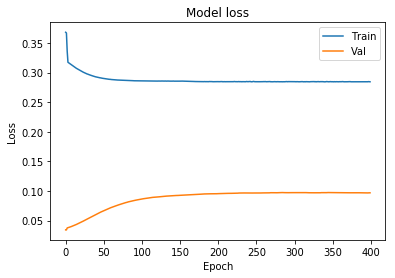

In [63]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [64]:
df_t2 = pd.read_excel(open('Cost.xls', 'rb'), sheet_name='Test2')
df_t2.head()

,Unit Name,Region,Water Depth\n(meters),"Technology Novelt (H,M,A,L,N)",Lessons Learned
0,Stybarrow Venture MV16,2,825,3,2
1,Alima FPU,1,600,1,3
2,Prelude,2,250,5,1
3,CLOV FPSO,1,1290,2,4
4,Dalia,1,1360,3,5


In [65]:
dataset_t2 = df_t2.values
Xnew2 = dataset_t2[:,1:5]
Xnew2

array([[2, 825, 3, 2],
       [1, 600, 1, 3],
       [2, 250, 5, 1],
       [1, 1290, 2, 4],
       [1, 1360, 3, 5],
       [1, 1350, 3, 1],
       [1, 1250, 1, 5],
       [1, 728, 1, 3],
       [1, 720, 1, 3],
       [1, 1350, 3, 2],
       [1, 2000, 5, 2],
       [1, 1425, 1, 2],
       [1, 1433, 2, 2],
       [1, 1325, 2, 1],
       [1, 1250, 3, 1],
       [1, 1600, 2, 3],
       [1, 1180, 2, 2],
       [1, 1250, 2, 3],
       [2, 250, 5, 2],
       [2, 200, 4, 4],
       [2, 340, 2, 2],
       [3, 1240, 1, 4],
       [3, 800, 1, 4],
       [3, 1040, 1, 2],
       [3, 1080, 2, 1],
       [3, 1300, 1, 4],
       [3, 2200, 1, 5],
       [3, 1170, 1, 2],
       [3, 1780, 5, 1],
       [3, 1315, 2, 5],
       [3, 765, 2, 4],
       [4, 90, 5, 1],
       [4, 120, 5, 1],
       [5, 2900, 4, 2],
       [6, 300, 4, 1],
       [7, 125, 5, 1],
       [6, 400, 5, 1],
       [6, 410, 2, 2],
       [6, 370, 4, 1],
       [6, 424, 2, 1],
       [1, 65, 2, 3],
       [1, 56, 2, 1],
       [1, 56, 

In [66]:
min_max_scaler = preprocessing.MinMaxScaler()
Xnew_scale2 = min_max_scaler.fit_transform(Xnew2)

In [67]:
ynew4 = model4.predict(Xnew_scale2)

In [68]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew[%s] = %s " % (loop,Xnew[loop],loop,ynew3[loop]))

The values of Xnew and its predicted yhat
Xnew[0] = [1 2 1 825 4096 1 3 3 4 4 2 2 702 0.5984251968503937], ynew[0] = [0.4312775] 
Xnew[1] = [2 1 2 600 3894 1 2 1 4 4 3 2 994 1.133], ynew[1] = [0.4199583] 
Xnew[2] = [6 2 2 250 5988 1 3 5 5 5 1 2 2229 11.16], ynew[2] = [0.41889444] 
Xnew[3] = [1 1 2 1290 5708 1 3 2 5 5 4 2 1383 1.8], ynew[3] = [0.41334358] 
Xnew[4] = [1 1 2 1360 3046 1 4 3 2 2 5 2 1306 3.4], ynew[4] = [0.41221893] 
Xnew[5] = [1 1 2 1350 1277 1 4 3 1 1 1 2 823 2.5], ynew[5] = [0.42492908] 
Xnew[6] = [1 1 2 1250 2930 1 3 1 2 2 5 2 1071 0.76], ynew[6] = [0.41286176] 
Xnew[7] = [1 1 1 728 4040 1 4 1 3 3 3 2 797 0.75], ynew[7] = [0.42474312] 
Xnew[8] = [1 1 1 720 4040 1 4 1 3 3 3 2 797 0.75], ynew[8] = [0.42477196] 
Xnew[9] = [1 1 2 1350 3318 1 3 3 5 5 2 2 1124 1.73], ynew[9] = [0.42112315] 
Xnew[10] = [1 1 2 2000 4929 1 5 5 1 1 2 2 1249 10.0], ynew[10] = [0.41674557] 
Xnew[11] = [1 1 1 1425 6791 1 4 1 5 5 2 2 1092 5.0], ynew[11] = [0.4218857] 
Xnew[12] = [1 1 2 1433 3713 1 2

In [69]:
ynew3

array([[0.4312775 ],
       [0.4199583 ],
       [0.41889444],
       [0.41334358],
       [0.41221893],
       [0.42492908],
       [0.41286176],
       [0.42474312],
       [0.42477196],
       [0.42112315],
       [0.41674557],
       [0.4218857 ],
       [0.4216423 ],
       [0.42239922],
       [0.4235803 ],
       [0.4105074 ],
       [0.4198017 ],
       [0.41916624],
       [0.42165658],
       [0.42077568],
       [0.4243414 ],
       [0.41344747],
       [0.41149133],
       [0.41512093],
       [0.42333287],
       [0.41227424],
       [0.41198736],
       [0.40976977],
       [0.42905313],
       [0.40556222],
       [0.41529402],
       [0.4400694 ],
       [0.43591705],
       [0.4234288 ],
       [0.43863997],
       [0.43714243],
       [0.43435022],
       [0.4317183 ],
       [0.42864543],
       [0.42142153],
       [0.41566223],
       [0.4225654 ],
       [0.4163721 ],
       [0.42449698],
       [0.4078379 ],
       [0.42130286],
       [0.40119866],
       [0.398